In [1]:
# Importando librerías 
import pandas as pd
import missingno as msno
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlim
from statistics import mode
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from utils import tipo_propiedad_train
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV


In [2]:
def tipo_propiedad_train(property_type):
    '''Evaluación del modelo sobre conjunto de datos de train'''
    
    property_type = prop_prueba.loc[prop_prueba['property_type'] == property_type]
    
    feature_cols = [x for x in property_type.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]
    
    # Generando Train y Test 
    X = property_type[feature_cols]
    y = property_type['price_aprox_usd']

    # División de los datos en train y test
    # ==============================================================================    
    X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     ) 

    # Generando modelo 

    X = X_train[feature_cols]
    y = y_train

    # Tenemos que agregar explícitamente una constante:
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()

    return model.summary()

In [3]:
def prediccion_modelo(property_type):
    '''Evaluación del modelo sobre conjunto de datos de test'''
    
    property_type = prop_prueba.loc[prop_prueba['property_type'] == property_type]
    
    feature_cols = [x for x in property_type.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]
    
    # Generando Train y Test 
    X = property_type[feature_cols]
    y = property_type['price_aprox_usd']

    X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     ) 
    # Haciendo predicción 
        
    model = LinearRegression()
    model.fit(X_train, y_train)
        
    print(pd.DataFrame(model.coef_, X.columns, columns = ['Coeff']))
    
    predictions = model.predict(X_test) 
    n = len(y_test)
    p = len(feature_cols)
    r2 = metrics.r2_score(y_test, predictions)
    r2_ajustado = 1 - (1 - r2)*((n-1)/(n - p - 1))
    
    MAE = metrics.mean_absolute_error(y_test, predictions)
    MSE = metrics.mean_squared_error(y_test, predictions)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, predictions))

    # Preguntar como sacar ambas gráficas 
    # plt.hist(y_test - predictions)
    sns.set(style='whitegrid')
    f = sns.scatterplot(x = y_test, y = predictions)
    f.set_xlabel("Y_test", fontsize = 20)
    f.set_ylabel("Predicción", fontsize = 20)

    
    return ("R2_test: ", r2) , ("R2 ajustado_test: ", r2_ajustado) , ('Mean Absolute Error_test:', MAE), ('Mean Squared Error_test:', MSE), ('Root Mean Squared Error_test:', RMSE)

## 1. Lectura de DataFrame 

In [4]:
data = pd.read_csv(r'propiedades.csv', sep = ',', index_col = 0)
print(f'El dataframe de properati está compuesto por {data.shape[1]} columnas y {data.shape[0]} filas') 
data.sample(3)
data.shape

El dataframe de properati está compuesto por 16 columnas y 107980 filas


(107980, 16)

In [5]:
# Considerando el volumen de datos y espacio geográfico abarcado por las diferentes provincias, 
# se procederá a estudiar la relación y variación de precios en propiedades en Capital Federal y posteriormente en Córdoba

data = data.loc[data['state_name'] == 'Capital Federal']
print(f'El dataframe de properati está compuesto por {data.shape[1]} columnas y {data.shape[0]} filas') 

El dataframe de properati está compuesto por 16 columnas y 31308 filas


## 2. Descripción breve del DataFrame.


El DataFrame en estudio cuenta con 15 columnas y un total de 31308 filas (incluyendo valores nulos) por columna. 

Las columnas contenidas en el DataFrame son: 

2.1 property_Type. Compuesta por datos del tipo string, en la cual se describe el tipo de propiedad. Ejemplo: PH, apartment, etc. 

2.2 place_name. Compuesta por datos del tipo string, en la cual se describe localidad donde está ubicada la propiedad. Ejemplo: Villa Crespo, Belgrano.

2.3 state_name. Compuesta por datos del tipo string, en la cual es informada la provincia en el cual se ubica la propiedad. Ejemplo: Capital Federal.

2.4 surface_total_in_m2. Compuesta por valores del tipo float64, y muestra la superficie total en metros cuadrados (m2) que abarca la propiedad. Ejemplo: 55.0.

2.5 surface_covered_in_m2. Compuesta por valores del tipo float64, y muestra la superficie cubierta en metros cuadrados (m2) dentro de la propiedad. Ejemplo: 40.0.

2.6 'apartment', 'house' y 'store'. Columnas con valores dummies para informar tipo de propiedad. 

2.7 ''amb_2.0', 'amb_3.0', 'amb_4.0', 'amb_5.0', 'amb_Mayor a 5', 'amb_No Informado'. Columnas con valores dummies para informar el número de ambientes en la propiedad. 

In [6]:
# Resumen de nombre y tipo de dato por columna

print('\n')
print('-----------Tipo de datos por columna-----------')
print(data.dtypes)



-----------Tipo de datos por columna-----------
property_type             object
place_name                object
state_name                object
price_aprox_usd          float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
price_usd_per_m2         float64
apartment                  int64
house                      int64
store                      int64
amb_2.0                    int64
amb_3.0                    int64
amb_4.0                    int64
amb_5.0                    int64
amb_Mayor a 5              int64
amb_No Informado           int64
dtype: object


## 3. Distribución de los datos.  

<AxesSubplot:>

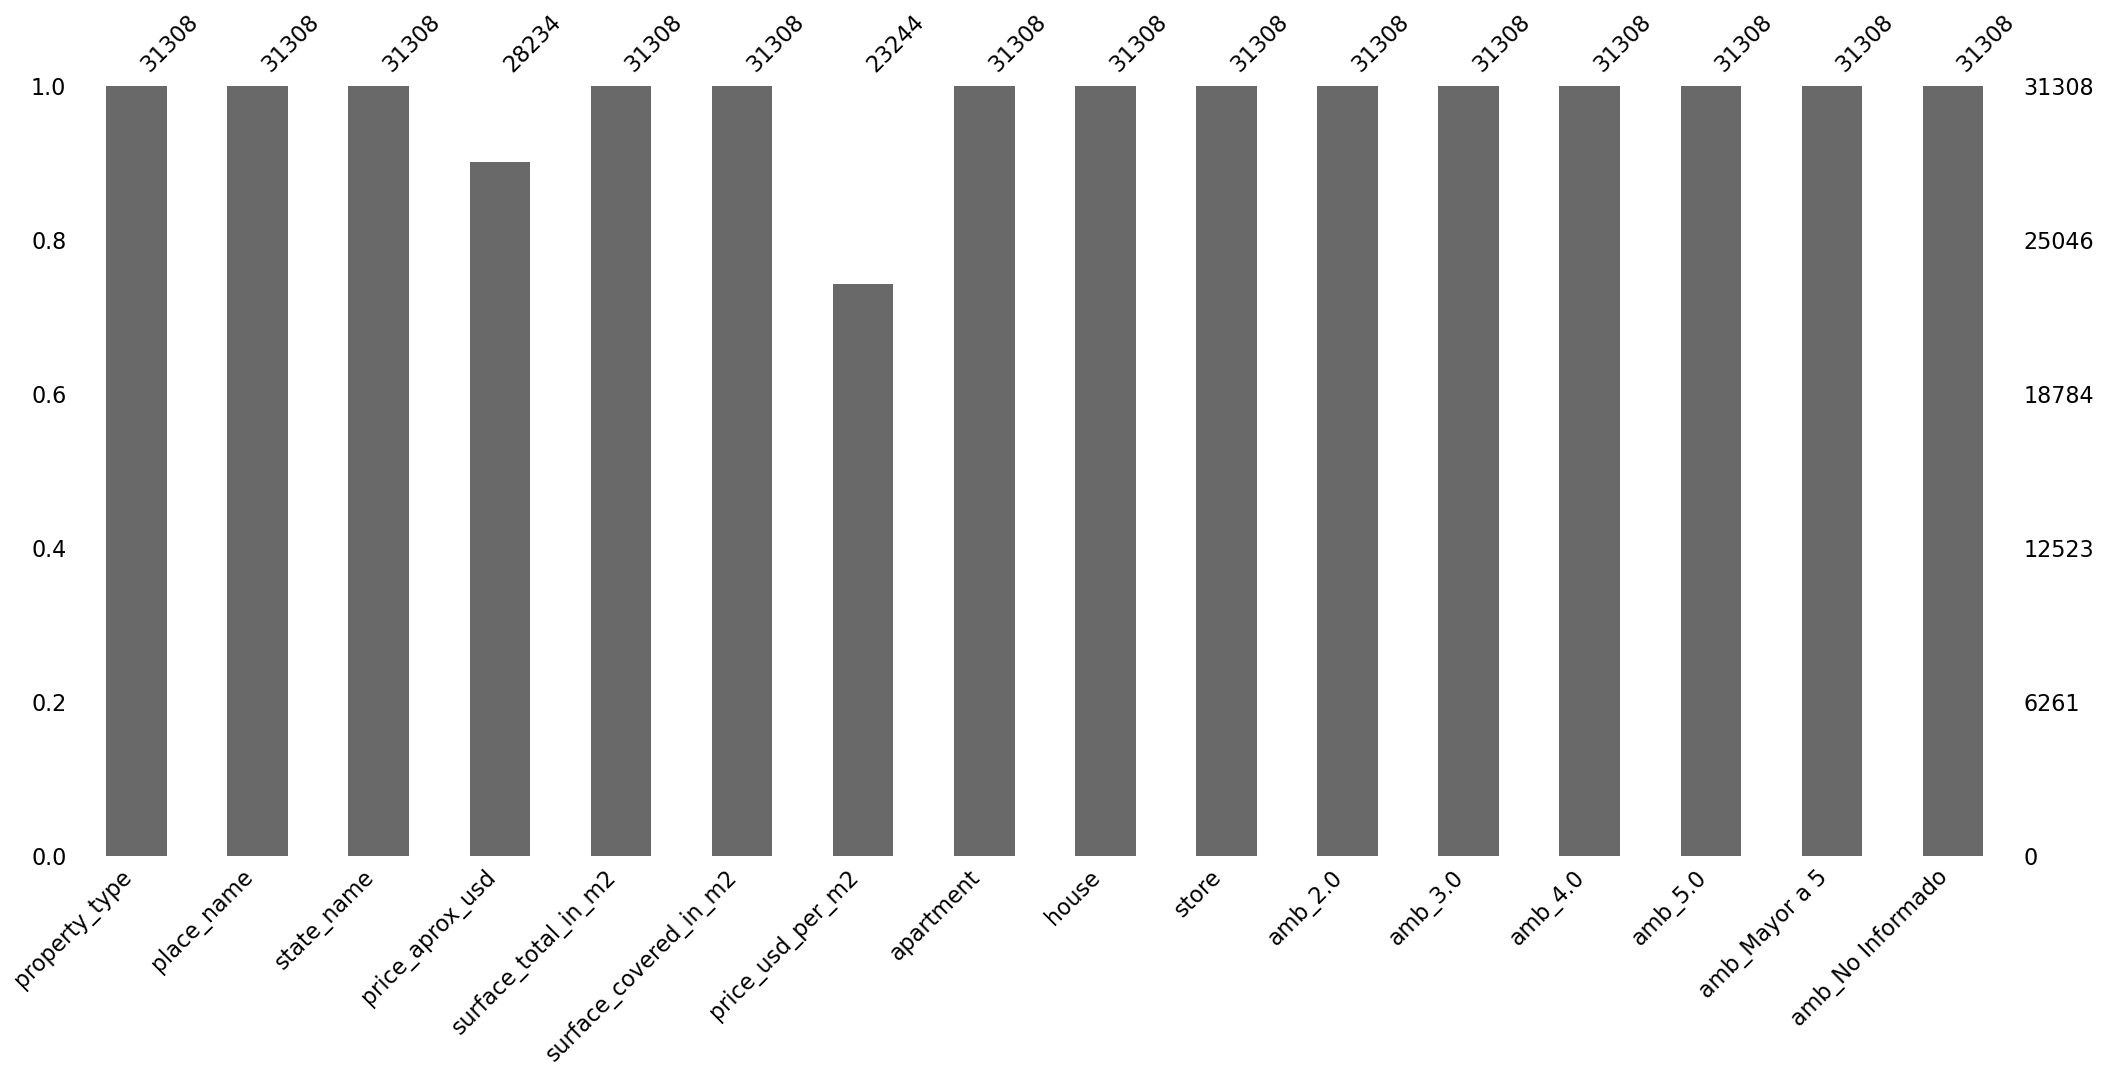

In [7]:
# Para saber valores no nulos

msno.bar(data)

MENCIONAR VARIABILIDAD DE LOS DATOS (HAY QUE COMPLETARLO)

Aproximadamente el 40% de las columnas contienen datos diferentes de NaN dentro de su estructura en el DataFrame. El restante 60% está distribuido de la siguiente manera: 
 - Columnas que contienen entre 50% y 80% de datos completos. (50%)
 - Columnas que contienen por debajo del 40% de datos completos. (10%)

TOMAR DECISIÓN RESPECTO A ¿CUÁL SERÁ NUESTRA VARIABLE TARGET? 

Según el análisis que hicimos para TP1 , propongo tomar como variable target la columna PRICE, QUE TENDRÍAMOS QUE RECUPERAR DEL DATAFRAME PRINCIPAL DE PROPERATTI O EN TAL CASO TOMAR LA COLUMNA PRICE_APROX_USD

## 4. Eliminación de datos.

Eliminar columna que tiene relación con precios y no son nuestra variable target, o ya fueron convertidas en variables dummies 

In [8]:
# data.drop(['price_usd_per_m2', 'property_type'], axis = 1, inplace = True)
data.drop(['price_usd_per_m2'], axis = 1, inplace = True)

Eliminar columnas donde existan valores nulos para la variable a predecir (price_aprox_usd)

In [9]:
data.dropna(axis = 0, subset = ['price_aprox_usd'], inplace = True)

<AxesSubplot:>

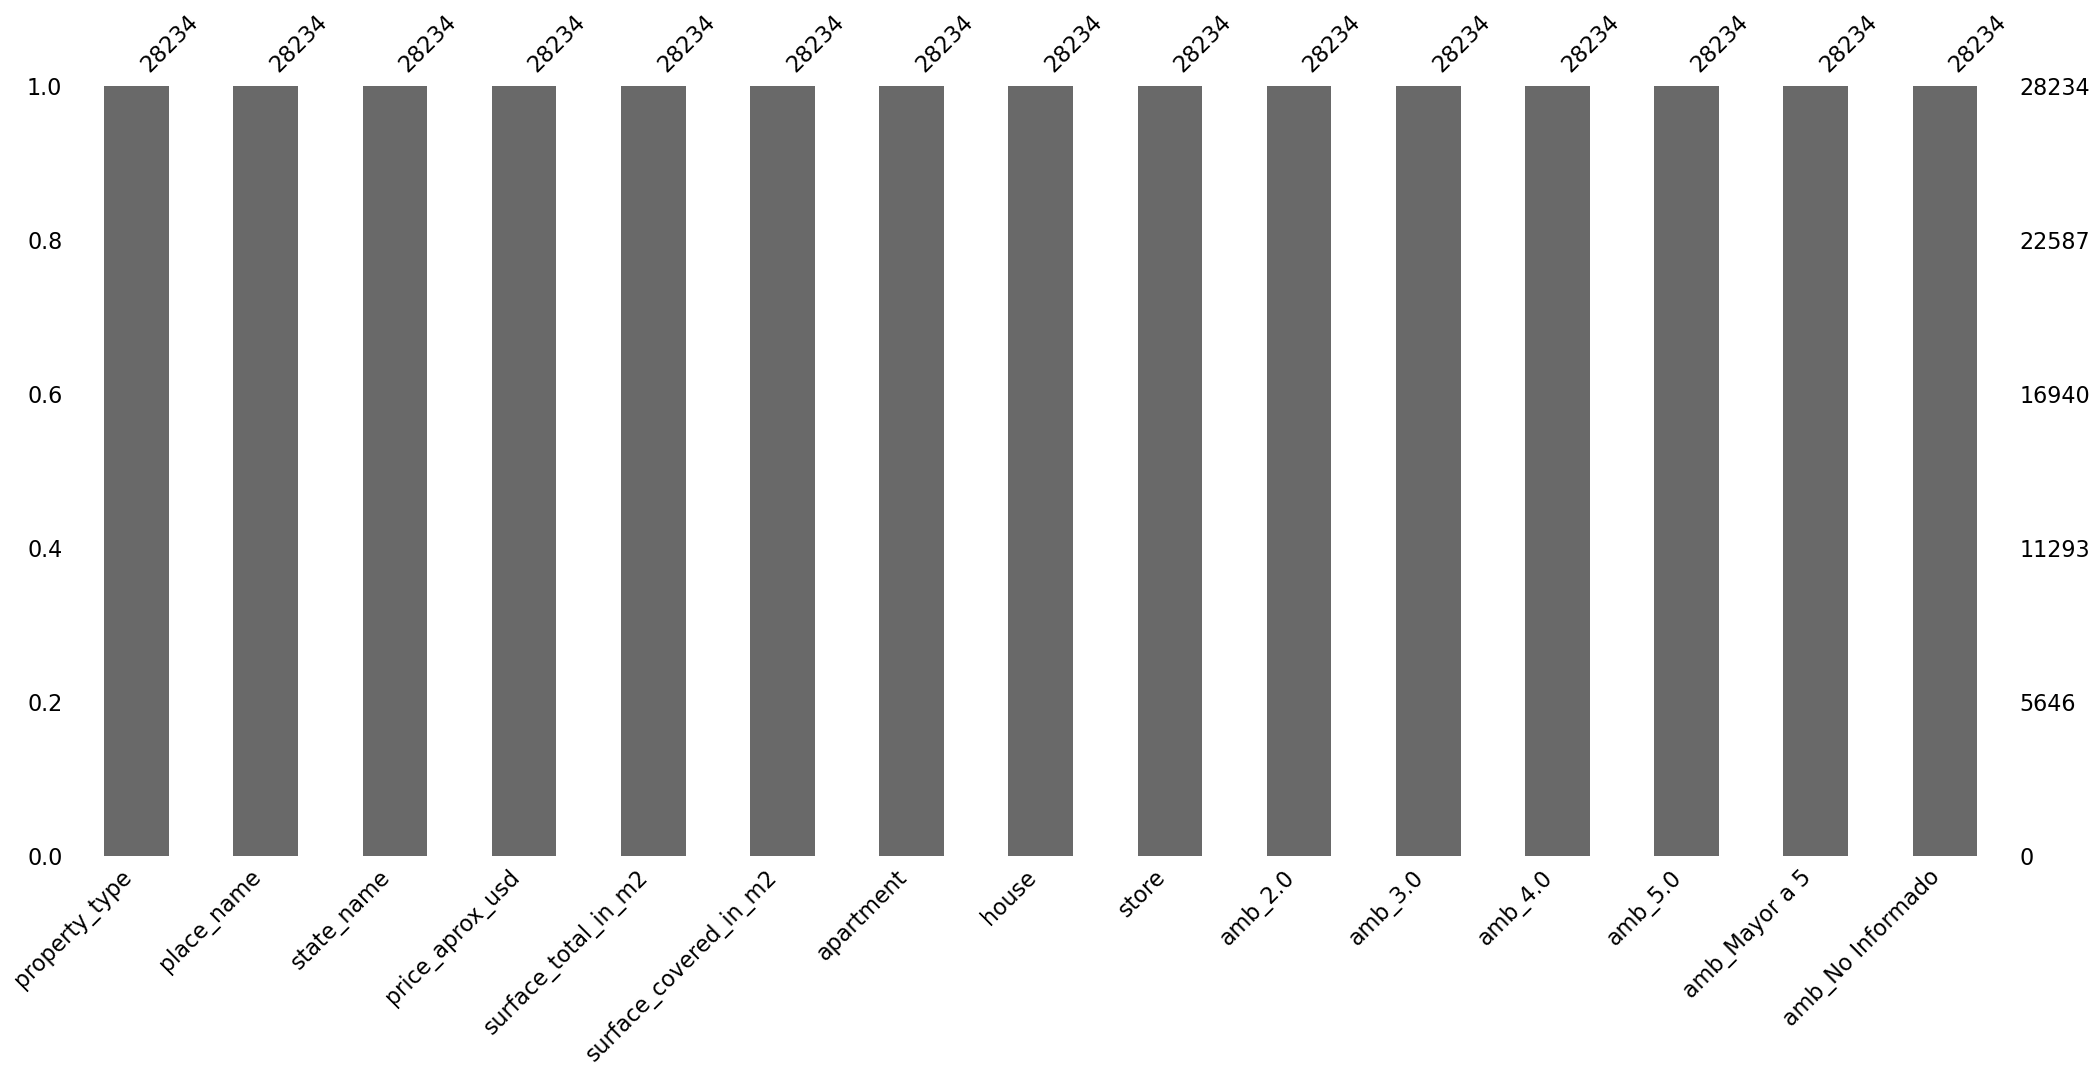

In [10]:
msno.bar(data)

In [11]:
data.sample(3)

,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,apartment,house,store,amb_2.0,amb_3.0,amb_4.0,amb_5.0,amb_Mayor a 5,amb_No Informado
47412,apartment,Belgrano,Capital Federal,90000.0,40.0,40.0,1,0,0,1,0,0,0,0,0
48857,apartment,Barrio Norte,Capital Federal,250000.0,113.0,113.0,1,0,0,0,1,0,0,0,0
29427,apartment,Palermo,Capital Federal,128000.0,50.0,50.0,1,0,0,0,0,0,0,0,1


## 5. Creación de Variables Dummies.

Continuando con el análisis, la propuesta ahora es generar variables dummy para aquellas variables categóricas que podrían aportar información valiosa al momento de clasificar las propiedades.

Analizando el DataFrame , será creado un nuevo grupo de propiedades en el cual estarán agrupadas todas aquellos Barrios dentro de Capital Federal que posean un número de propiedades menor o igual a 100.

In [12]:
place_group = (data.groupby(['place_name'])['place_name'].count()).sort_values(ascending=False)
display(place_group)

place_name
Belgrano           2516
Palermo            2473
Caballito          2031
Recoleta           1403
Villa Urquiza      1350
                   ... 
Agronomía            37
Velez Sarsfield      34
Villa Soldati        15
Villa Riachuelo       5
Catalinas             2
Name: place_name, Length: 62, dtype: int64

In [13]:
# Convertimos a DataFrame
place = pd.DataFrame(place_group)
place.index.name = None

# Generamos nuevo DataFrame con Barrios dentro de Capital Federal con 500 propiedades o menos 
pocas_propiedades = place[place['place_name'] <= 500]

pocas_prop = pocas_propiedades.index
pocas_prop

Index(['Palermo Hollywood', 'Villa del Parque', 'San Cristobal', 'Floresta',
       'Barracas', 'Villa Devoto', 'Mataderos', 'Villa Luro', 'Colegiales',
       'Palermo Soho', 'Liniers', 'Parque Patricios', 'Congreso', 'Coghlan',
       'Retiro', 'Centro / Microcentro', 'Chacarita', 'Constitución', 'Boca',
       'Palermo Chico', 'Villa Lugano', 'Villa Pueyrredón', 'San Nicolás',
       'Paternal', 'Once', 'Parque Chacabuco', 'Las Cañitas', 'Abasto',
       'Tribunales', 'Villa Ortuzar', 'Monte Castro', 'Parque Centenario',
       'Pompeya', 'Villa Santa Rita', 'Parque Avellaneda', 'Versalles',
       'Villa General Mitre', 'Parque Chas', 'Palermo Viejo', 'Villa Real',
       'Agronomía', 'Velez Sarsfield', 'Villa Soldati', 'Villa Riachuelo',
       'Catalinas'],
      dtype='object')

In [14]:
# Cambiamos el nombre de los Barrios por 'Otros Barrios' para aquellos Barrios encontradas en el paso anterior 
data['place_name'][data['place_name'].isin(pocas_prop)] = 'Otros Barrios'
data.sample(3)

C:\Users\User\AppData\Local\Temp\ipykernel_2812\636339655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['place_name'][data['place_name'].isin(pocas_prop)] = 'Otros Barrios'


,property_type,place_name,state_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,apartment,house,store,amb_2.0,amb_3.0,amb_4.0,amb_5.0,amb_Mayor a 5,amb_No Informado
116145,apartment,Almagro,Capital Federal,175000.0,88.000000,80.0,1,0,0,0,0,0,0,0,1
60823,apartment,Otros Barrios,Capital Federal,70000.0,56.230292,32.0,1,0,0,0,1,0,0,0,0
26522,apartment,Almagro,Capital Federal,780900.0,31.000000,31.0,1,0,0,0,0,0,0,0,0


In [15]:
# Previo a la eliminación de la columna place_name agrupamos las propiedades para conocer tendencias 
data.groupby(['property_type','place_name']).size().unstack(fill_value=0)

place_name,Almagro,Balvanera,Barrio Norte,Belgrano,Boedo,Caballito,Capital Federal,Flores,Monserrat,Nuñez,Otros Barrios,Palermo,Puerto Madero,Recoleta,Saavedra,San Telmo,Villa Crespo,Villa Urquiza
property_type,,,,,,,,,,,,,,,,,,
PH,63,34,12,43,31,72,39,95,16,28,953,102,0,10,44,27,83,85
apartment,847,547,935,2325,720,1866,408,1016,434,613,6127,2222,550,1313,409,1063,993,1187
house,29,5,7,99,38,61,420,86,4,39,805,60,4,3,42,11,30,59
store,32,32,48,49,21,32,65,54,52,22,387,89,9,77,9,48,75,19


In [16]:
# Generación de variables Dummies para state_name

place_name_dummies = pd.get_dummies(data['place_name'])

# Para incorporar nuevas columnas dummies al DataFrame
propiedades = data.join([place_name_dummies])

In [17]:
# Eliminamos la columna dummy Otros Barrios para evitar multicolinealidad en el DataFrame y además la columna state_name
propiedades.drop(['Otros Barrios', 'state_name'], axis = 1, inplace=True)

# Para eliminar filas que contengan Otros Barrios
propiedades = propiedades[propiedades['place_name'] != 'Otros Barrios']
propiedades.shape

(19962, 31)

<AxesSubplot:>

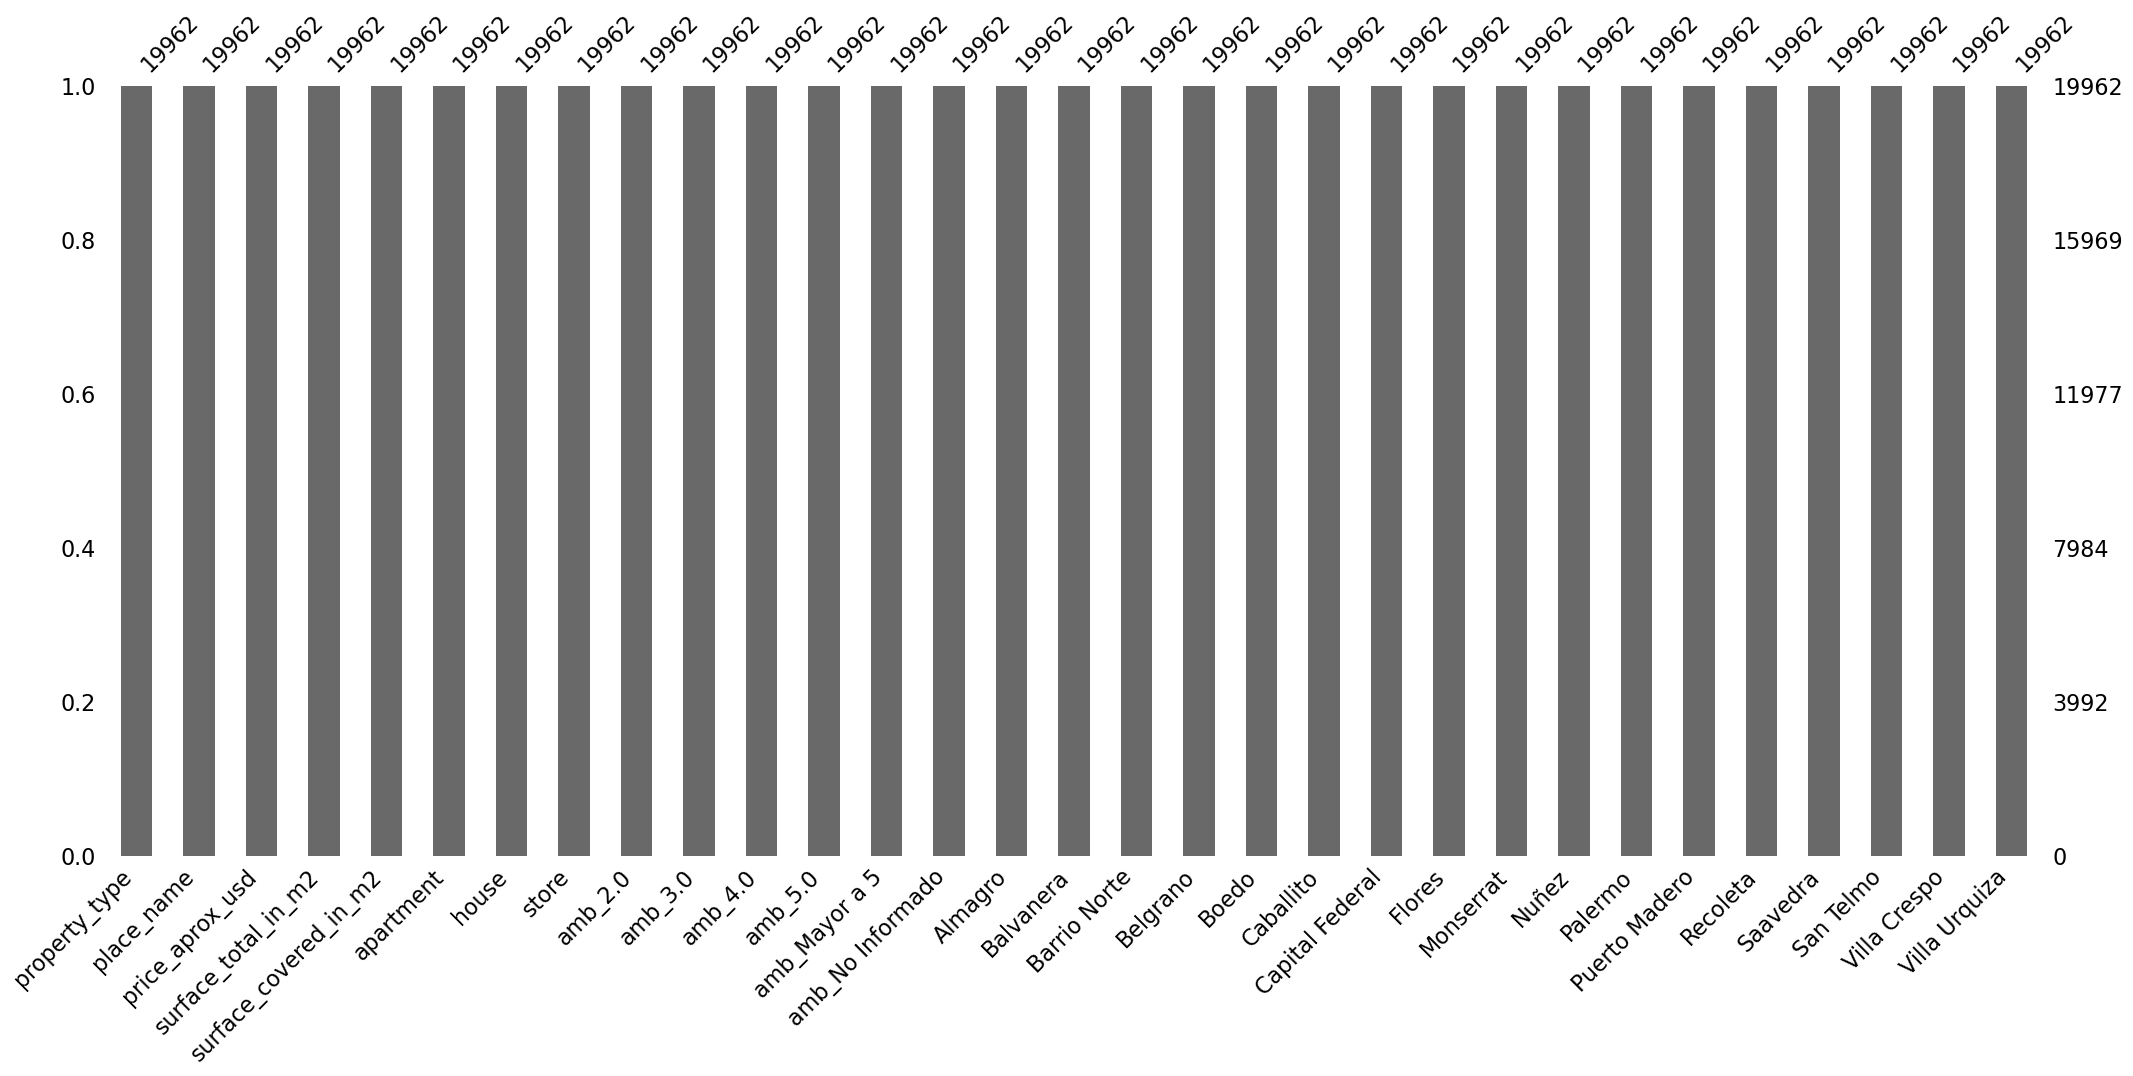

In [18]:
msno.bar(propiedades)

<AxesSubplot:>

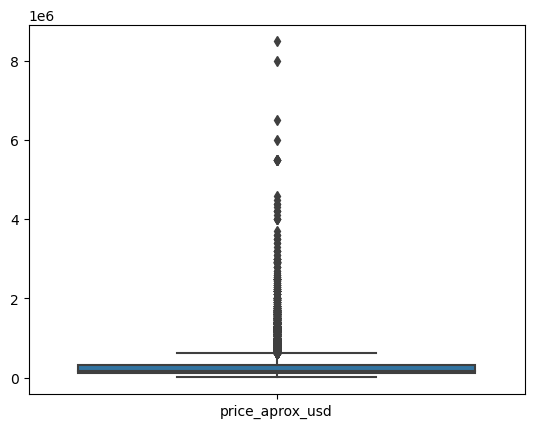

In [19]:
# Generamos algunas gráficas para ver distribución de los datos 
sns.boxplot(data=propiedades[["price_aprox_usd"]], orient="v")

<AxesSubplot:>

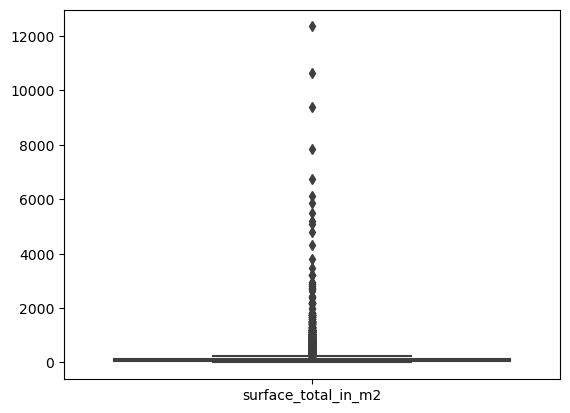

In [20]:
sns.boxplot(data=propiedades[['surface_total_in_m2']], orient="v")

<AxesSubplot:>

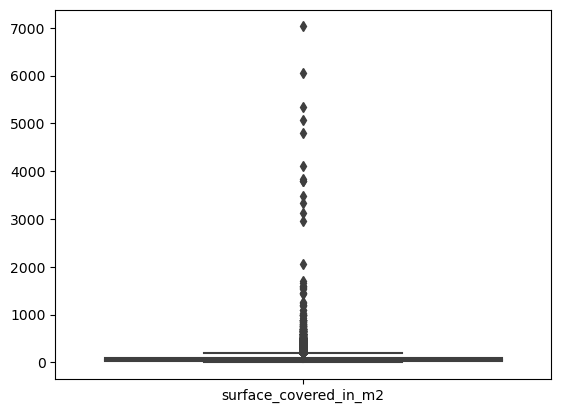

In [21]:
sns.boxplot(data=propiedades[['surface_covered_in_m2']], orient="v")

[(0.0, 6000.0)]

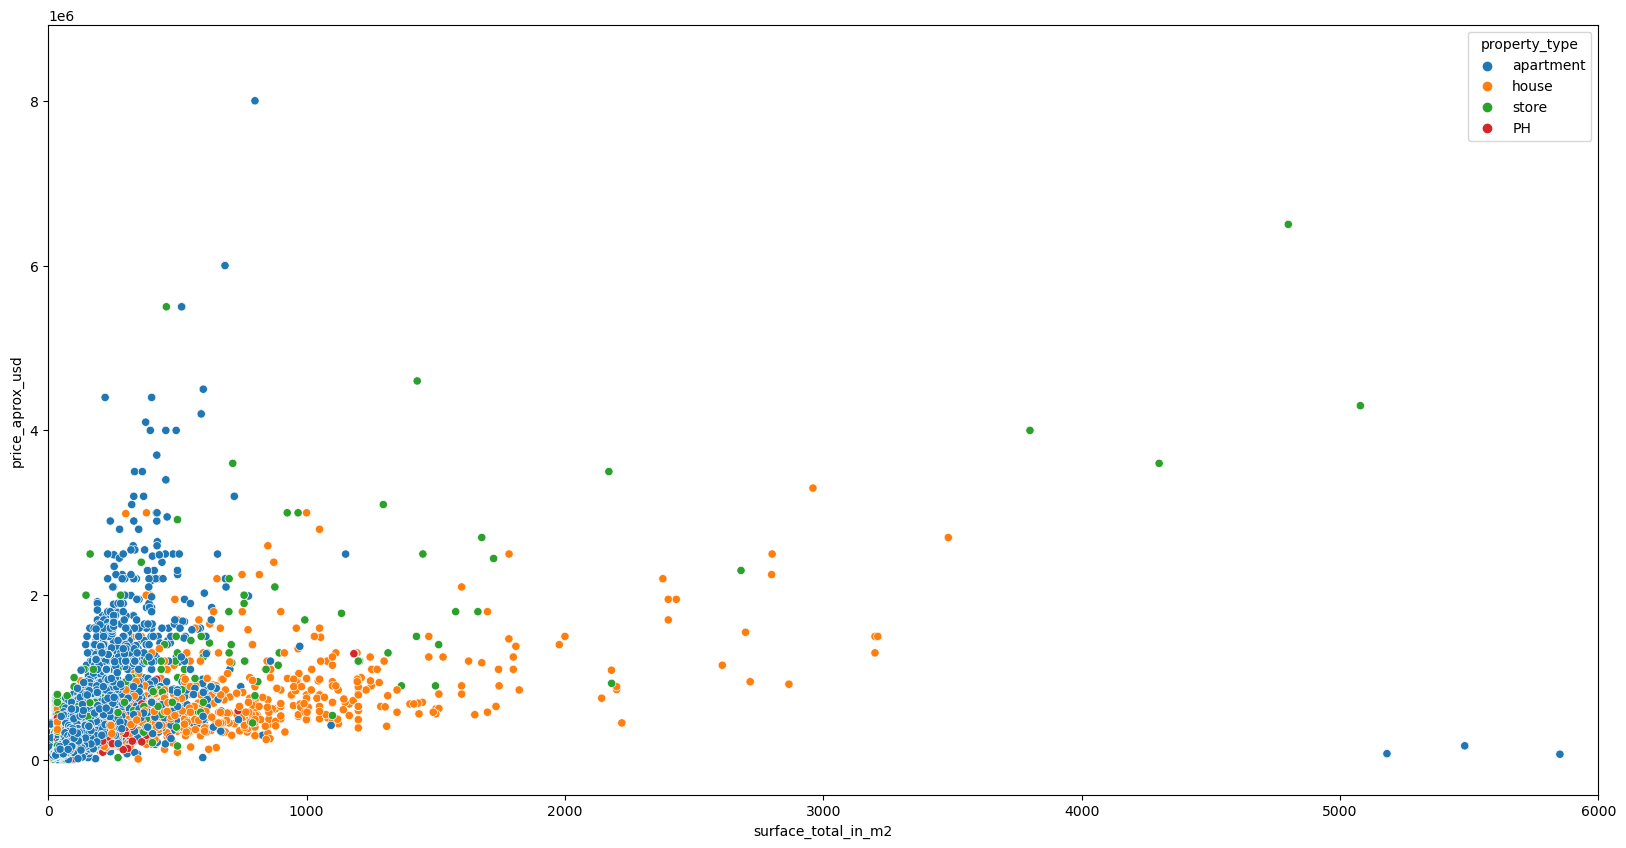

In [22]:
# Estudiamos la existencia de correlación lineal entre la superficie (cubierta y total) con precio aproximado en USD de la propiedad

plt.figure(figsize=(20,10))
tipo_propiedad = sns.scatterplot(x='surface_total_in_m2', y="price_aprox_usd",  data=propiedades, hue='property_type')
tipo_propiedad.set(xlim = (0,6000))
# tipo_propiedad.set(ylim = (0, 500000))

[(0.0, 6000.0)]

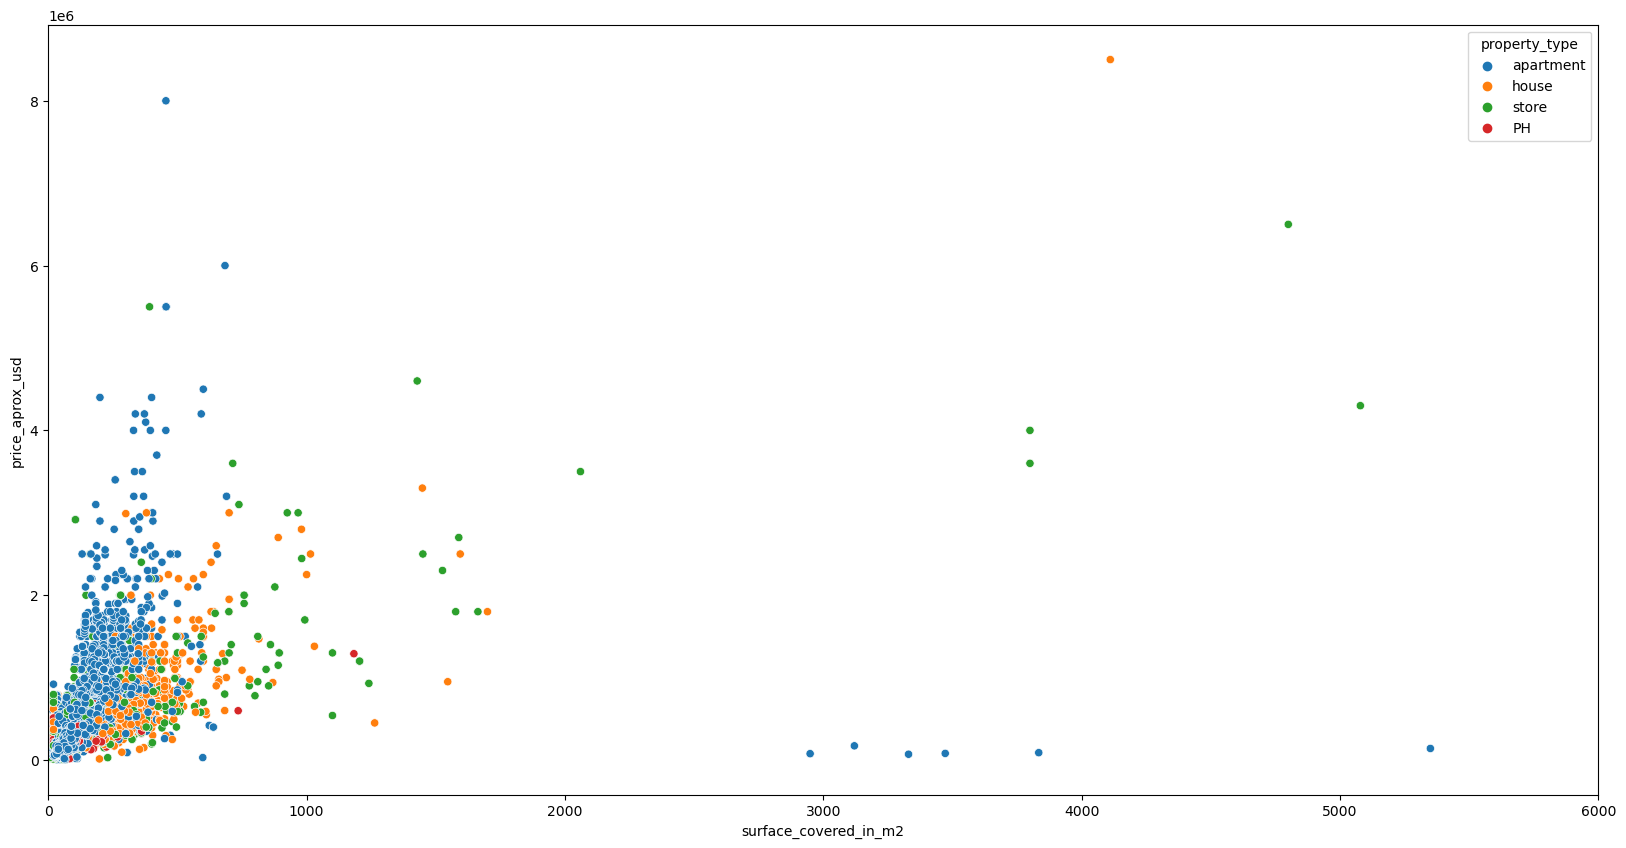

In [23]:
# Estudiamos la existencia de correlación lineal entre la superficie (cubierta y total) con precio aproximado en USD de la propiedad

plt.figure(figsize=(20,10))
tipo_propiedad = sns.scatterplot(x='surface_covered_in_m2', y="price_aprox_usd",  data=propiedades, hue='property_type')
tipo_propiedad.set(xlim = (0,6000))
# tipo_propiedad.set(ylim = (0, 500000))

In [29]:
# Estudiando las gráficas anteriormente creadas, se decide eliminar las observaciones donde un apartamento 
# tenga una superficie cubierta y total superior a 2000 metros.
propiedades = propiedades[propiedades['surface_covered_in_m2']<2000]

[(0.0, 6000.0)]

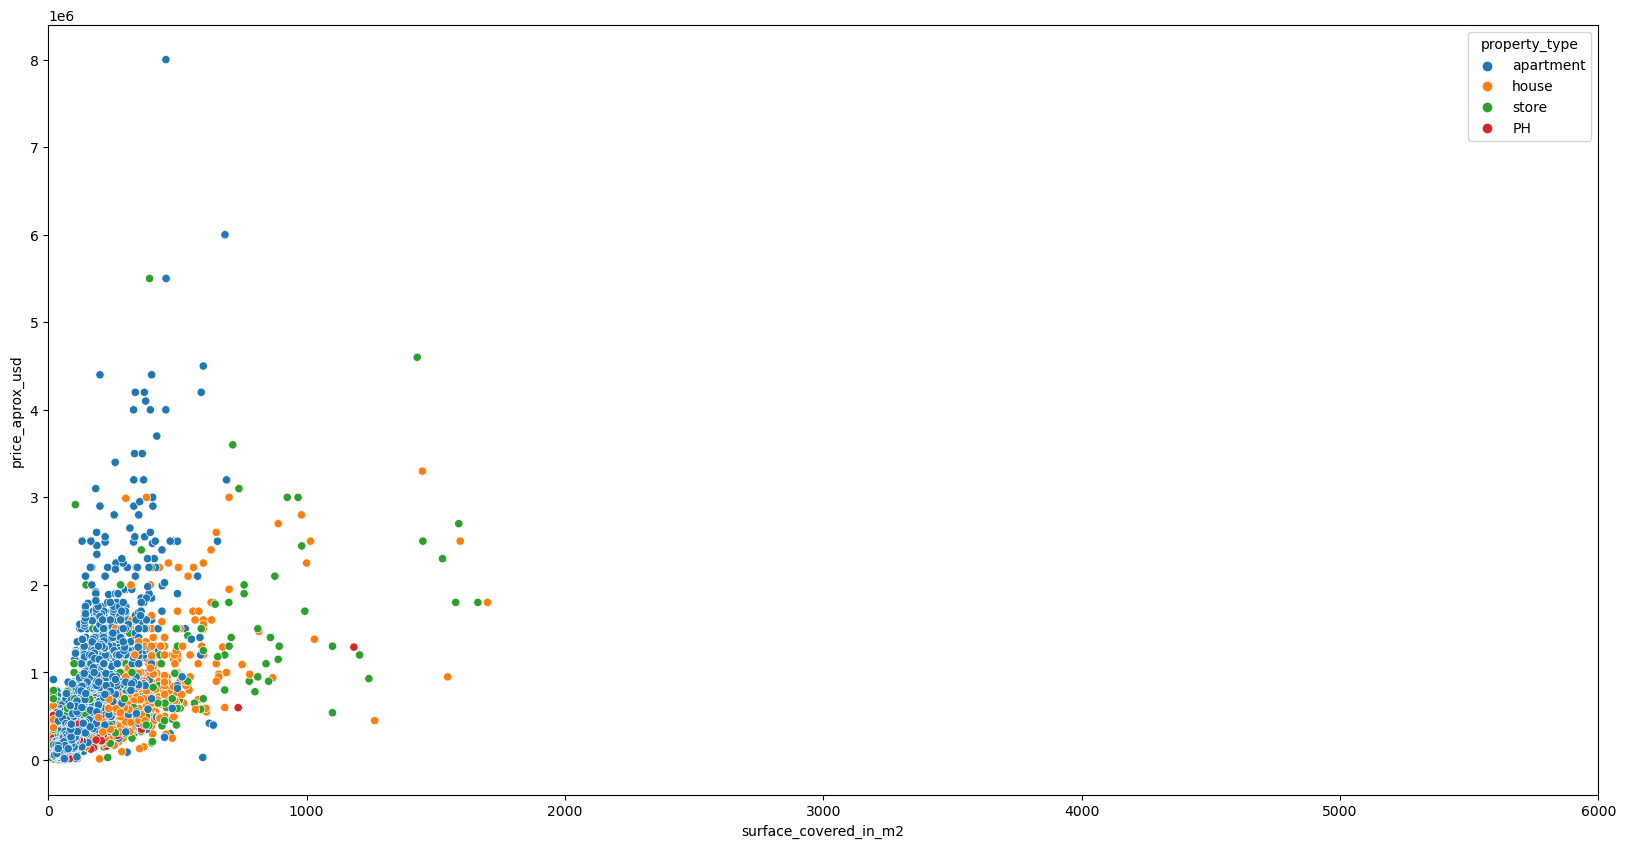

In [30]:
# Estudiamos nuevamente la existencia de correlación lineal entre la superficie (cubierta y total) con precio aproximado en USD de la propiedad

plt.figure(figsize=(20,10))
tipo_propiedad = sns.scatterplot(x='surface_covered_in_m2', y="price_aprox_usd",  data=propiedades, hue='property_type')
tipo_propiedad.set(xlim = (0,6000))
# tipo_propiedad.set(ylim = (0, 500000))

En la gráfica se evidencia cierta correlación lineal positiva entre superficie (total y cubierta) y precio de la propiedad, independientemente del tipo de propiedad. Con mayores pendientes para los tipos de propiedades apartment y store en comparación con house y PH. 

In [31]:
# Para garantizar que no existen valores nulos en el DataFrame
propiedades.isnull().sum()

property_type            0
place_name               0
price_aprox_usd          0
surface_total_in_m2      0
surface_covered_in_m2    0
apartment                0
house                    0
store                    0
amb_2.0                  0
amb_3.0                  0
amb_4.0                  0
amb_5.0                  0
amb_Mayor a 5            0
amb_No Informado         0
Almagro                  0
Balvanera                0
Barrio Norte             0
Belgrano                 0
Boedo                    0
Caballito                0
Capital Federal          0
Flores                   0
Monserrat                0
Nuñez                    0
Palermo                  0
Puerto Madero            0
Recoleta                 0
Saavedra                 0
San Telmo                0
Villa Crespo             0
Villa Urquiza            0
dtype: int64

## 6. MODELO OLS - MÍNIMO CUADRADOS

## 6.1. Considerando todos los tipos de propiedades - 1era Aproximación.

Buscando diferentes aproximaciones a la solución que resuelva la relación entre precio de las propiedades y el grupo de features, en primer lugar consideramos todos los tipos de propiedades (house, apartment, PH, store).

Antes de ejecutar los números tenemos que definir una hipótesis nula y una hipótesis alternativa:

Hipótesis nula (H0): NO existe asociación entre el tipo de propiedad y el valor aproximado de la propiedad en USD(considerando los factores de confusión elegidos);

Hipótesis Alternativa (H1): Existe asociación entre el tipo de propiedad y el valor aproximado de la propiedad en USD.


In [32]:
# Creando copia del DataFrame original 
prop_prueba = propiedades.copy()
prop_prueba.shape

(19948, 31)

In [33]:
# Para considerar las variables predictoras
feature_cols = [x for x in propiedades.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]

In [34]:
# División de los datos en train y test
# ==============================================================================
X = prop_prueba[feature_cols]
y = prop_prueba['price_aprox_usd']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )   

Como 1er ejercicio vamos a considerar como features solo las columnas relacionadas con superficie (cubierta y total). 

In [35]:
# Para armar el modelo basados en OLS (Ordinary Least Squares) - Mínimos cuadrados
X = X_train[['surface_total_in_m2',
 'surface_covered_in_m2']]
y = y_train

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     7155.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:28:19   Log-Likelihood:            -2.2134e+05
No. Observations:               15958   AIC:                         4.427e+05
Df Residuals:                   15955   BIC:                         4.427e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.804e+

El bajo R2 obtenido (<30%) indica que ambas features por si sólo no son suficientes para explicar la variablidad de la mayoría de los resultados en el conjunto de datos de test. 

Por ello, vamos a considerar todas las features en los sucesivos modelos a probar. 

In [36]:
# Para armar el modelo basados en OLS (Ordinary Least Squares) - Mínimos cuadrados
X = X_train[feature_cols]
y = y_train

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     823.4
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:28:23   Log-Likelihood:            -2.1948e+05
No. Observations:               15958   AIC:                         4.390e+05
Df Residuals:                   15930   BIC:                         4.392e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.032e+

A partir del análisis de la tabla resumen, se extrae lo siguiente: 
* El modelo logra explicar el 42% de la variabilidad de los resultados, según el R2 ajustado. 

* Considerando el Intervalo de Confianza (IC) del 95% obtenido para la feature Capital Federal con p-value < 0.05 y que incluye el 0 dentro de dicho intervalo, sugiriendo que la asociación no es estadísticamente significativa, por lo que no se puede rechazar la hipótesis nula de no asociación. Respecto a la variable surface_covered_in_m2 parecería ser la feature con mayor influencia con un alto valor de coeficiente respecto a surface_covered_in_m2, p-valur menor a 0.05, coeficiente cercano a 1500 e IC entre 1278.098 y 1431.973. 

In [37]:
# Considerando los valores obtenidos para p-values e IC con 95% de confianza, será eliminada la feature Capital Federal 
X_train.drop(['Capital Federal'], axis = 1, inplace =True)
feature_cols = [x for x in X_train.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]


# Para armar el modelo basados en OLS (Ordinary Least Squares) - Mínimos cuadrados
X = X_train[feature_cols]
y = y_train

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     823.4
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:28:29   Log-Likelihood:            -2.1948e+05
No. Observations:               15958   AIC:                         4.390e+05
Df Residuals:                   15930   BIC:                         4.392e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -8.56e+

Al eliminar la feature Capital Federal no se observa mejoría del R2 para el modelo. En esta 1era aproximación, sin discriminar por tipo de propiedad, el modelo logra explicar solo en un 42% la variabilidad de los resultados. 

Por ello, en una 2da aproximación y en búsqueda de mejorar el modelo serán realizadas otras aproximaciones, por ejemplo: considerar el tipo de propiedad.

## 6.2. Discriminando por tipo de propiedad

In [35]:
# Creando copia del DataFrame original 
prop_prueba = propiedades.copy()
prop_prueba.shape

(19962, 31)

# 6.2.1. Modelo para Tipo de Propiedad PH

In [36]:
tipo_propiedad_train('PH')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     66.72
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          6.84e-149
Time:                        05:17:34   Log-Likelihood:                -7859.9
No. Observations:                 627   AIC:                         1.577e+04
Df Residuals:                     603   BIC:                         1.587e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5.941e+04   1.95e+04      3.040      0.002     2.1e+04    9.78e+04
surface_total_in_m2     415.7442     67.263      6.181      0.000     283.645     547.843
surface_covered_in_m2   554.0399     88.797      6.239      0.000     379.652     728.428
apartment             -4.161e-11   3.82e-11     -1.089      0.277   -1.17e-10    3.34e-11
house                 -1.924e-11   2.33e-11     -0.824      0.410   -6.51e-11    2.66e-11
store                  3.834e-11   1.37e-11      2.802      0.005    1.15e-11    6.52e-11
amb_2.0               -2321.3990   2.31e+04     -0.101      0.920   -4.76e+04     4.3e+04
amb_3.0                2.139e+04   2.19e+04      0.976      0.329   -2.17e+04    6.44e+04
amb_4.0                5.866e+04   2.21e+04      2.655      0.008    1.53e+04    1.02e+05
amb_5.0                8.222e+04   2.29e+04      3.588      0.000    3.72e+04    1.27e+05
amb_Mayor a 5          8.895e+04   2.52e+04      3.525      0.000    3.94e+04    1.39e+05
amb_No Informado       3.877e+04   2.19e+04      1.774      0.077   -4155.047    8.17e+04
Almagro               -1.316e+04   9604.817     -1.370      0.171    -3.2e+04    5705.218
Balvanera             -5.307e+04   1.32e+04     -4.021      0.000    -7.9e+04   -2.72e+04
Barrio Norte           3.648e+04   2.08e+04      1.755      0.080   -4337.132    7.73e+04
Belgrano               8.472e+04   1.11e+04      7.608      0.000    6.29e+04    1.07e+05
Boedo                 -3.888e+04   1.35e+04     -2.890      0.004   -6.53e+04   -1.25e+04
Caballito              -523.9281   9360.770     -0.056      0.955   -1.89e+04    1.79e+04
Capital Federal       -5.543e+04   1.26e+04     -4.408      0.000   -8.01e+04   -3.07e+04
Flores                -4.999e+04   8769.839     -5.700      0.000   -6.72e+04   -3.28e+04
Monserrat             -5.213e+04   2.02e+04     -2.586      0.010   -9.17e+04   -1.25e+04
Nuñez                  6.846e+04   1.37e+04      4.980      0.000    4.15e+04    9.55e+04
Palermo                7.404e+04   8069.270      9.175      0.000    5.82e+04    8.99e+04
Puerto Madero         -2.864e-13   9.83e-14     -2.913      0.004    -4.8e-13   -9.33e-14
Recoleta               5.759e+04   2.21e+04      2.608      0.009    1.42e+04    1.01e+05
Saavedra               1.355e+04   1.19e+04      1.137      0.256   -9853.702    3.69e+04
San Telmo             -2.353e+04   1.42e+04     -1.659      0.098   -5.14e+04    4331.305
Villa Crespo           3266.6333   8795.880      0.371      0.710    -1.4e+04    2.05e+04
Villa Urquiza          8022.3396   8934.340      0.898      0.370   -9523.863    2.56e+04
==============================================================================
Omnibus:                      158.235   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.000   Jarqu

In [37]:
# Considerando los valores obtenidos para p-values e IC con 95% de confianza, serán eliminadas las columnas Dummies para Tipo de Propiedad y numero de ambientes 
prop_prueba.drop(['apartment', 'house', 'store', 'amb_2.0','amb_3.0'], axis = 1, inplace =True)
prop_prueba.columns

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'amb_4.0', 'amb_5.0', 'amb_Mayor a 5',
       'amb_No Informado', 'Almagro', 'Balvanera', 'Barrio Norte', 'Belgrano',
       'Boedo', 'Caballito', 'Capital Federal', 'Flores', 'Monserrat', 'Nuñez',
       'Palermo', 'Puerto Madero', 'Recoleta', 'Saavedra', 'San Telmo',
       'Villa Crespo', 'Villa Urquiza'],
      dtype='object')

### 2da Ejecución (Tipo Propiedad PH)


In [38]:
tipo_propiedad_train('PH')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     72.52
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          9.65e-150
Time:                        05:17:35   Log-Likelihood:                -7862.3
No. Observations:                 627   AIC:                         1.577e+04
Df Residuals:                     605   BIC:                         1.587e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.163e+04   5509.056     13.002      0.000    6.08e+04    8.24e+04
surface_total_in_m2     422.4958     67.338      6.274      0.000     290.251     554.741
surface_covered_in_m2   552.4622     88.987      6.208      0.000     377.701     727.224
amb_4.0                4.414e+04   8426.614      5.238      0.000    2.76e+04    6.07e+04
amb_5.0                6.756e+04   1.03e+04      6.532      0.000    4.72e+04    8.79e+04
amb_Mayor a 5          7.423e+04   1.51e+04      4.910      0.000    4.45e+04    1.04e+05
amb_No Informado       2.412e+04   7558.751      3.191      0.001    9276.251     3.9e+04
Almagro               -1.274e+04   9622.721     -1.324      0.186   -3.16e+04    6153.495
Balvanera              -5.31e+04   1.32e+04     -4.033      0.000    -7.9e+04   -2.72e+04
Barrio Norte           3.852e+04   2.07e+04      1.859      0.064   -2177.811    7.92e+04
Belgrano               8.579e+04    1.1e+04      7.803      0.000    6.42e+04    1.07e+05
Boedo                 -3.736e+04   1.33e+04     -2.803      0.005   -6.35e+04   -1.12e+04
Caballito              1387.0633   9243.982      0.150      0.881   -1.68e+04    1.95e+04
Capital Federal       -5.365e+04   1.25e+04     -4.295      0.000   -7.82e+04   -2.91e+04
Flores                -4.851e+04   8585.337     -5.651      0.000   -6.54e+04   -3.17e+04
Monserrat             -5.749e+04    1.9e+04     -3.020      0.003   -9.49e+04   -2.01e+04
Nuñez                   6.93e+04   1.37e+04      5.073      0.000    4.25e+04    9.61e+04
Palermo                7.569e+04   7862.144      9.627      0.000    6.02e+04    9.11e+04
Puerto Madero         -7.022e-12      6e-12     -1.170      0.243   -1.88e-11    4.77e-12
Recoleta               5.546e+04   2.19e+04      2.528      0.012    1.24e+04    9.85e+04
Saavedra               1.453e+04   1.18e+04      1.234      0.218   -8599.147    3.76e+04
San Telmo             -2.295e+04   1.42e+04     -1.618      0.106   -5.08e+04    4898.247
Villa Crespo           6067.4775   8545.483      0.710      0.478   -1.07e+04    2.28e+04
Villa Urquiza          1.072e+04   8719.811      1.229      0.220   -6409.685    2.78e+04
==============================================================================
Omnibus:                      155.959   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              654.276
Skew:                           1.074   Prob(JB):                    8.43e-143
Kurtosis:                       7.520   Cond. No.                     5.42e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.81e-31. This might indicate that there are
str

In [39]:
# Considerando los valores obtenidos para p-values e IC con 95% de confianza, serán eliminadas las columnas Dummies para Tipo de Propiedad y numero de ambientes 
prop_prueba.drop(['Almagro','San Telmo', 'Barrio Norte', 'Caballito', 'Saavedra', 'Villa Crespo', 'Villa Urquiza', 'Puerto Madero'], axis = 1, inplace =True)
prop_prueba.columns

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'amb_4.0', 'amb_5.0', 'amb_Mayor a 5',
       'amb_No Informado', 'Balvanera', 'Belgrano', 'Boedo', 'Capital Federal',
       'Flores', 'Monserrat', 'Nuñez', 'Palermo', 'Recoleta'],
      dtype='object')

### 3era Ejecución (Tipo Propiedad PH)

In [40]:
tipo_propiedad_train('PH')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     100.2
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.75e-153
Time:                        05:17:35   Log-Likelihood:                -7867.4
No. Observations:                 627   AIC:                         1.577e+04
Df Residuals:                     611   BIC:                         1.584e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.549e+04   6258.547     12.061      0.000    6.32e+04    8.78e+04
surface_total_in_m2     437.5361     67.177      6.513      0.000     305.610     569.462
surface_covered_in_m2   517.4685     87.594      5.908      0.000     345.447     689.490
amb_4.0                4.303e+04   8388.539      5.130      0.000    2.66e+04    5.95e+04
amb_5.0                6.777e+04   1.03e+04      6.560      0.000    4.75e+04    8.81e+04
amb_Mayor a 5          6.776e+04   1.49e+04      4.533      0.000    3.84e+04    9.71e+04
amb_No Informado       2.677e+04   7508.953      3.565      0.000     1.2e+04    4.15e+04
Balvanera             -5.475e+04   1.42e+04     -3.858      0.000   -8.26e+04   -2.69e+04
Belgrano               8.312e+04   1.19e+04      6.988      0.000    5.98e+04    1.06e+05
Boedo                 -3.988e+04   1.44e+04     -2.775      0.006   -6.81e+04   -1.17e+04
Capital Federal       -5.904e+04   1.34e+04     -4.402      0.000   -8.54e+04   -3.27e+04
Flores                -5.218e+04   9348.506     -5.582      0.000   -7.05e+04   -3.38e+04
Monserrat             -6.061e+04   2.05e+04     -2.963      0.003   -1.01e+05   -2.04e+04
Nuñez                  6.701e+04   1.47e+04      4.562      0.000    3.82e+04    9.59e+04
Palermo                7.255e+04   8649.427      8.388      0.000    5.56e+04    8.95e+04
Recoleta               5.271e+04   2.35e+04      2.245      0.025    6598.612    9.88e+04
==============================================================================
Omnibus:                      158.557   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.196
Skew:                           1.098   Prob(JB):                    1.96e-143
Kurtosis:                       7.509   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A partir de la eliminación de más del 40% de las features del conjunto de train no se logra una mejora considerable del R2 ajustado, manteniéndose alrededor de 0.7%. Considerando este valor será evaluado la predicción del modelo con el conjunto de test. 

## 6.2.1.1 Evaluando el modelo con datos del conjunto test

                              Coeff
surface_total_in_m2      437.536068
surface_covered_in_m2    517.468485
amb_4.0                43029.559455
amb_5.0                67769.067312
amb_Mayor a 5          67759.873140
amb_No Informado       26770.287607
Balvanera             -54751.722034
Belgrano               83120.347354
Boedo                 -39876.950044
Capital Federal       -59041.001828
Flores                -52182.894058
Monserrat             -60605.467026
Nuñez                  67006.706658
Palermo                72550.647402
Recoleta               52714.291678


(('R2_test: ', 0.6573058503293399),
 ('R2 ajustado_test: ', 0.6208490258962909),
 ('Mean Absolute Error_test:', 41292.40923617976),
 ('Mean Squared Error_test:', 3223090469.731339),
 ('Root Mean Squared Error_test:', 56772.26849203173))

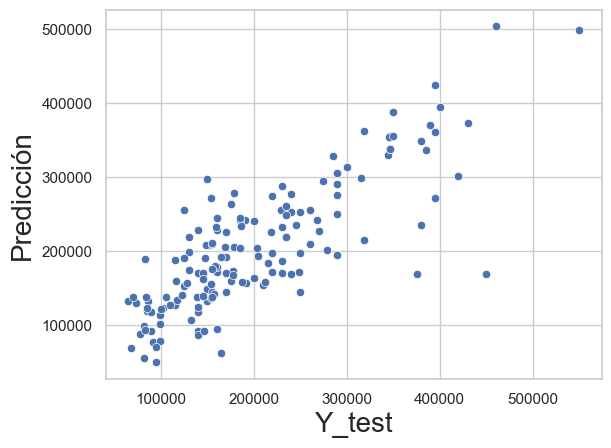

In [41]:
prediccion_modelo('PH')

# 6.2.2 Modelo para Tipo de Propiedad Apartment 

In [42]:
# Para la generación del modelo en un nuevo tipo de Propiedad, trabajaremos sobre el DataFrame base. 
prop_prueba = propiedades.copy()

In [43]:
# Realizando 1era validación considerando sólo las variables predictoras relacionadas con superficie de la propiedad

apartment = prop_prueba.loc[prop_prueba['property_type'] == 'apartment']
    
feature_cols = [x for x in apartment.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]
    
# Generando Train y Test 
X = apartment[feature_cols]
y = apartment['price_aprox_usd']

# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )  

X = X_train[['surface_total_in_m2',
       'surface_covered_in_m2']]
y = y_train

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3997.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:17:35   Log-Likelihood:            -1.9365e+05
No. Observations:               13958   AIC:                         3.873e+05
Df Residuals:                   13955   BIC:                         3.873e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  8.184e+

Como 1er ejercicio considerando como columnas predictoras aquellas relacionadas con superficie, obtenemos un R2 ajustado = R2 bajo de 0.36. Este valor será considerado como valor mínimo a mejorar con la adición de nuevas features al modelo. 

### 1era Ejecución (Tipo Propiedad Apartment)

In [44]:
# Ejecutando el modelo considerando todas las columnas

tipo_propiedad_train('apartment')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     586.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:17:35   Log-Likelihood:            -1.9194e+05
No. Observations:               13958   AIC:                         3.839e+05
Df Residuals:                   13933   BIC:                         3.841e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_total_in_m2   -2776.3811     53.720    -51.682      0.000   -2881.680   -2671.082
surface_covered_in_m2  5373.8954     91.262     58.884      0.000    5195.009    5552.781
apartment              9.633e+04   5129.442     18.780      0.000    8.63e+04    1.06e+05
house                 -1.079e-09   1.76e-10     -6.126      0.000   -1.42e-09   -7.34e-10
store                  4.782e-09   7.11e-10      6.728      0.000    3.39e-09    6.17e-09
amb_2.0               -2.615e+04   7782.644     -3.360      0.001   -4.14e+04   -1.09e+04
amb_3.0                1.401e+04   7934.505      1.765      0.078   -1544.875    2.96e+04
amb_4.0                1.017e+05   8788.041     11.575      0.000    8.45e+04    1.19e+05
amb_5.0                 1.85e+05   1.34e+04     13.804      0.000    1.59e+05    2.11e+05
amb_Mayor a 5          3.453e+05   1.82e+04     19.016      0.000     3.1e+05    3.81e+05
amb_No Informado       1.982e+04   6201.619      3.197      0.001    7668.666     3.2e+04
Almagro               -8.181e+04   8602.582     -9.510      0.000   -9.87e+04   -6.49e+04
Balvanera             -1.193e+05   1.07e+04    -11.197      0.000    -1.4e+05   -9.84e+04
Barrio Norte           -2.69e+04   8264.374     -3.255      0.001   -4.31e+04   -1.07e+04
Belgrano               2.609e+04   5445.511      4.791      0.000    1.54e+04    3.68e+04
Boedo                  1.328e+05   9694.008     13.704      0.000    1.14e+05    1.52e+05
Caballito             -6.066e+04   5980.574    -10.142      0.000   -7.24e+04   -4.89e+04
Capital Federal       -2176.9887   1.21e+04     -0.181      0.857   -2.58e+04    2.15e+04
Flores                -9.394e+04   7888.031    -11.909      0.000   -1.09e+05   -7.85e+04
Monserrat             -1.098e+05   1.17e+04     -9.368      0.000   -1.33e+05   -8.68e+04
Nuñez                  1.063e+05   9842.323     10.805      0.000    8.71e+04    1.26e+05
Palermo                5.036e+04   5542.128      9.086      0.000    3.95e+04    6.12e+04
Puerto Madero          5.092e+05   1.05e+04     48.567      0.000    4.89e+05     5.3e+05
Recoleta               5077.3567   7096.902      0.715      0.474   -8833.523     1.9e+04
Saavedra               -3.46e+04   1.18e+04     -2.924      0.003   -5.78e+04   -1.14e+04
San Telmo              -8.74e+04   7660.758    -11.409      0.000   -1.02e+05   -7.24e+04
Villa Crespo           -7.18e+04   7878.240     -9.113      0.000   -8.72e+04   -5.64e+04
Villa Urquiza         -4.518e+04   7342.795     -6.152      0.000   -5.96e+04   -3.08e+04
==============================================================================
Omnibus:                    15568.707   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3458566.540
Skew:                           5.405   Prob(JB):       

### 2da Ejecución (Tipo Propiedad Apartment)

In [45]:
# En 1era instancia serán eliminadas las features relacionadas con tipo de propiedad ya que sólo estamos estudiando las relaciones para 'apartment'

prop_prueba.drop(['apartment', 'house', 'store'], axis = 1, inplace =True)


# Eliminando todas estas columnas R2 ajustado disminuye a 47%
#prop_prueba.drop(['apartment', 'house', 'store', 'amb_2.0','amb_3.0', 'amb_4.0', 'amb_5.0', 
#                            'amb_Mayor a 5', 'amb_No Informado'], axis = 1, inplace =True)

prop_prueba.columns

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'amb_5.0',
       'amb_Mayor a 5', 'amb_No Informado', 'Almagro', 'Balvanera',
       'Barrio Norte', 'Belgrano', 'Boedo', 'Caballito', 'Capital Federal',
       'Flores', 'Monserrat', 'Nuñez', 'Palermo', 'Puerto Madero', 'Recoleta',
       'Saavedra', 'San Telmo', 'Villa Crespo', 'Villa Urquiza'],
      dtype='object')

In [46]:
tipo_propiedad_train('apartment')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     586.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:17:35   Log-Likelihood:            -1.9194e+05
No. Observations:               13958   AIC:                         3.839e+05
Df Residuals:                   13933   BIC:                         3.841e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  9.633e+04   5129.442     18.780      0.000    8.63e+04    1.06e+05
surface_total_in_m2   -2776.3811     53.720    -51.682      0.000   -2881.680   -2671.082
surface_covered_in_m2  5373.8954     91.262     58.884      0.000    5195.009    5552.781
amb_2.0               -2.615e+04   7782.644     -3.360      0.001   -4.14e+04   -1.09e+04
amb_3.0                1.401e+04   7934.505      1.765      0.078   -1544.875    2.96e+04
amb_4.0                1.017e+05   8788.041     11.575      0.000    8.45e+04    1.19e+05
amb_5.0                 1.85e+05   1.34e+04     13.804      0.000    1.59e+05    2.11e+05
amb_Mayor a 5          3.453e+05   1.82e+04     19.016      0.000     3.1e+05    3.81e+05
amb_No Informado       1.982e+04   6201.619      3.197      0.001    7668.666     3.2e+04
Almagro               -8.181e+04   8602.582     -9.510      0.000   -9.87e+04   -6.49e+04
Balvanera             -1.193e+05   1.07e+04    -11.197      0.000    -1.4e+05   -9.84e+04
Barrio Norte           -2.69e+04   8264.374     -3.255      0.001   -4.31e+04   -1.07e+04
Belgrano               2.609e+04   5445.511      4.791      0.000    1.54e+04    3.68e+04
Boedo                  1.328e+05   9694.008     13.704      0.000    1.14e+05    1.52e+05
Caballito             -6.066e+04   5980.574    -10.142      0.000   -7.24e+04   -4.89e+04
Capital Federal       -2176.9887   1.21e+04     -0.181      0.857   -2.58e+04    2.15e+04
Flores                -9.394e+04   7888.031    -11.909      0.000   -1.09e+05   -7.85e+04
Monserrat             -1.098e+05   1.17e+04     -9.368      0.000   -1.33e+05   -8.68e+04
Nuñez                  1.063e+05   9842.323     10.805      0.000    8.71e+04    1.26e+05
Palermo                5.036e+04   5542.128      9.086      0.000    3.95e+04    6.12e+04
Puerto Madero          5.092e+05   1.05e+04     48.567      0.000    4.89e+05     5.3e+05
Recoleta               5077.3567   7096.902      0.715      0.474   -8833.523     1.9e+04
Saavedra               -3.46e+04   1.18e+04     -2.924      0.003   -5.78e+04   -1.14e+04
San Telmo              -8.74e+04   7660.758    -11.409      0.000   -1.02e+05   -7.24e+04
Villa Crespo           -7.18e+04   7878.240     -9.113      0.000   -8.72e+04   -5.64e+04
Villa Urquiza         -4.518e+04   7342.795     -6.152      0.000   -5.96e+04   -3.08e+04
==============================================================================
Omnibus:                    15568.707   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3458566.540
Skew:                           5.405   Prob(JB):                         0.00
Kurtosis:                      79.354   Cond. No.                     9.85e+17
==============================================================================

### 3era Ejecución (Tipo Propiedad Apartment)

In [47]:
# Considerando los valores obtenidos para p-values e IC con 95% de confianza, serán eliminadas features correspondientes a Capital Federal y Recoleta

prop_prueba.drop(['Capital Federal', 'Recoleta'], axis = 1, inplace =True)
prop_prueba.columns

Index(['property_type', 'place_name', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'amb_2.0', 'amb_3.0', 'amb_4.0', 'amb_5.0',
       'amb_Mayor a 5', 'amb_No Informado', 'Almagro', 'Balvanera',
       'Barrio Norte', 'Belgrano', 'Boedo', 'Caballito', 'Flores', 'Monserrat',
       'Nuñez', 'Palermo', 'Puerto Madero', 'Saavedra', 'San Telmo',
       'Villa Crespo', 'Villa Urquiza'],
      dtype='object')

In [48]:
tipo_propiedad_train('apartment')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     612.1
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:17:36   Log-Likelihood:            -1.9194e+05
No. Observations:               13958   AIC:                         3.839e+05
Df Residuals:                   13934   BIC:                         3.841e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   9.97e+04   8237.859     12.102      0.000    8.36e+04    1.16e+05
surface_total_in_m2   -2777.7357     53.650    -51.775      0.000   -2882.898   -2672.574
surface_covered_in_m2  5376.2585     91.137     58.991      0.000    5197.617    5554.900
amb_2.0               -2.619e+04   7782.058     -3.365      0.001   -4.14e+04   -1.09e+04
amb_3.0                1.398e+04   7934.136      1.762      0.078   -1568.986    2.95e+04
amb_4.0                1.018e+05   8785.875     11.588      0.000    8.46e+04    1.19e+05
amb_5.0                1.852e+05   1.34e+04     13.829      0.000    1.59e+05    2.12e+05
amb_Mayor a 5          3.457e+05   1.81e+04     19.062      0.000     3.1e+05    3.81e+05
amb_No Informado       1.954e+04   6175.364      3.164      0.002    7435.962    3.16e+04
Almagro               -8.514e+04   1.08e+04     -7.856      0.000   -1.06e+05   -6.39e+04
Balvanera             -1.227e+05   1.27e+04     -9.670      0.000   -1.48e+05   -9.78e+04
Barrio Norte          -3.027e+04   1.04e+04     -2.917      0.004   -5.06e+04   -9929.035
Belgrano               2.281e+04   8099.917      2.816      0.005    6936.275    3.87e+04
Boedo                  1.295e+05   1.19e+04     10.836      0.000    1.06e+05    1.53e+05
Caballito             -6.394e+04   8592.906     -7.441      0.000   -8.08e+04   -4.71e+04
Flores                -9.722e+04   1.02e+04     -9.558      0.000   -1.17e+05   -7.73e+04
Monserrat             -1.131e+05   1.38e+04     -8.224      0.000    -1.4e+05   -8.61e+04
Nuñez                  1.031e+05   1.19e+04      8.641      0.000    7.97e+04    1.26e+05
Palermo                4.707e+04   8188.847      5.749      0.000     3.1e+04    6.31e+04
Puerto Madero          5.058e+05   1.24e+04     40.798      0.000    4.82e+05     5.3e+05
Saavedra               -3.78e+04   1.38e+04     -2.734      0.006   -6.49e+04   -1.07e+04
San Telmo             -9.063e+04      1e+04     -9.054      0.000    -1.1e+05    -7.1e+04
Villa Crespo          -7.504e+04   1.02e+04     -7.368      0.000    -9.5e+04   -5.51e+04
Villa Urquiza         -4.839e+04   9729.243     -4.974      0.000   -6.75e+04   -2.93e+04
==============================================================================
Omnibus:                    15563.922   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3454941.900
Skew:                           5.402   Prob(JB):                         0.00
Kurtosis:                      79.314   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are

### 4ta Ejecución (Tipo Propiedad Apartment) -- No considerada

In [49]:
# Eliminando las features restantes relacionadas a los Barrios 

#prop_prueba.drop(['Almagro', 'Balvanera',
#       'Barrio Norte', 'Belgrano', 'Boedo', 'Caballito', 'Flores', 'Monserrat',
#       'Nuñez', 'Palermo', 'Puerto Madero', 'Saavedra', 'San Telmo',
#       'Villa Crespo', 'Villa Urquiza'], axis = 1, inplace =True)

# R2 ajustado disminuye a 38%

![title](apartment_1.png)

### 5ta Ejecución (Tipo Propiedad Apartment) -- No considerada

In [50]:
# Eliminando las features relacionadas con superficie

## prop_prueba.drop(['surface_total_in_m2', 'surface_covered_in_m2'], axis = 1, inplace =True)

Disminuye considerablemente (mas de 20%) el R2 , implicando menor poder predictivo para la variable precio por el modelo.

![title](apartment_2.png)

Considerando que la eliminación de features de diferente naturaleza (numero de ambientes, Barrios) no aumenta el valor de R2 o R2 ajustado, y por lo tanto no mejora la explicación de la variabilidad del modelo, serán tomadas las features de la 2da ejecución para proceder a la evaluación del modelo con el conjunto de datos de test.  

## 6.2.2.1 Evaluando el modelo con datos del conjunto test

                               Coeff
surface_total_in_m2     -2777.735683
surface_covered_in_m2    5376.258536
amb_2.0                -26189.012695
amb_3.0                 13982.985665
amb_4.0                101810.122354
amb_5.0                185248.781043
amb_Mayor a 5          345686.887925
amb_No Informado        19540.505292
Almagro                -85136.103033
Balvanera             -122663.908134
Barrio Norte           -30272.203038
Belgrano                22813.199875
Boedo                  129485.598672
Caballito              -63935.664587
Flores                 -97215.551328
Monserrat             -113090.621626
Nuñez                  103082.700602
Palermo                 47074.883262
Puerto Madero          505812.322622
Saavedra               -37803.686596
San Telmo              -90626.525315
Villa Crespo           -75040.984878
Villa Urquiza          -48390.588150


(('R2_test: ', 0.4209058523369167),
 ('R2 ajustado_test: ', 0.4170630463945477),
 ('Mean Absolute Error_test:', 113648.110721374),
 ('Mean Squared Error_test:', 73633128189.91255),
 ('Root Mean Squared Error_test:', 271354.24852010806))

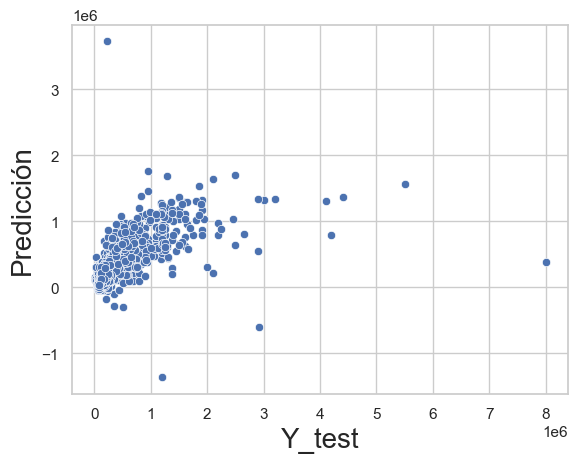

In [51]:
prediccion_modelo('apartment')

# 6.2.3 Modelo para Tipo de Propiedad House 

In [52]:
# Para la generación del modelo en un nuevo tipo de Propiedad, trabajaremos sobre el DataFrame base. 
prop_prueba = propiedades.copy()

In [53]:
# Realizando 1era validación considerando sólo las variables predictoras relacionadas con superficie de la propiedad

house = prop_prueba.loc[prop_prueba['property_type'] == 'house']

feature_cols = [x for x in house.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]
    
# Generando Train y Test 
X = house[feature_cols]
y = house['price_aprox_usd']

# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )  

X = X_train[['surface_total_in_m2',
       'surface_covered_in_m2']]
y = y_train

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     425.6
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.41e-126
Time:                        05:17:36   Log-Likelihood:                -11211.
No. Observations:                 797   AIC:                         2.243e+04
Df Residuals:                     794   BIC:                         2.244e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.207e+

Como 1er ejercicio considerando como columnas predictoras aquellas relacionadas con superficie, obtenemos un R2 ajustado mayor a 0.5. Este valor será considerado como valor mínimo a mejorar con la adición de nuevas features al modelo. 

### 1era Ejecución (Tipo Propiedad House)

In [54]:
tipo_propiedad_train('house')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     62.24
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          2.85e-162
Time:                        05:17:36   Log-Likelihood:                -11072.
No. Observations:                 797   AIC:                         2.219e+04
Df Residuals:                     772   BIC:                         2.231e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_total_in_m2     327.4400     35.259      9.287      0.000     258.225     396.655
surface_covered_in_m2  1043.2096     86.092     12.117      0.000     874.208    1212.212
apartment             -4.601e-08   1.33e-08     -3.465      0.001   -7.21e-08   -1.99e-08
house                  2.649e+05   7.66e+04      3.457      0.001    1.14e+05    4.15e+05
store                  1.971e-09   6.74e-10      2.925      0.004    6.48e-10    3.29e-09
amb_2.0                -2.77e+05    1.3e+05     -2.129      0.034   -5.32e+05   -2.16e+04
amb_3.0               -1.358e+05   1.22e+05     -1.112      0.266   -3.75e+05    1.04e+05
amb_4.0               -1.588e+05   9.04e+04     -1.757      0.079   -3.36e+05    1.86e+04
amb_5.0               -8.817e+04   8.73e+04     -1.010      0.313   -2.59e+05    8.31e+04
amb_Mayor a 5         -6.401e+04   8.67e+04     -0.739      0.460   -2.34e+05    1.06e+05
amb_No Informado      -8.206e+04   8.16e+04     -1.005      0.315   -2.42e+05    7.82e+04
Almagro                -1.29e+05    5.9e+04     -2.186      0.029   -2.45e+05   -1.31e+04
Balvanera             -1.824e+05   1.15e+05     -1.589      0.112   -4.08e+05    4.29e+04
Barrio Norte           5.973e+05   1.06e+05      5.622      0.000    3.89e+05    8.06e+05
Belgrano               3.244e+05   3.62e+04      8.957      0.000    2.53e+05    3.95e+05
Boedo                 -5.947e+04   5.45e+04     -1.092      0.275   -1.66e+05    4.75e+04
Caballito             -4.599e+04   4.12e+04     -1.116      0.265   -1.27e+05    3.49e+04
Capital Federal       -1.758e+05    3.1e+04     -5.669      0.000   -2.37e+05   -1.15e+05
Flores                -1.462e+05   3.79e+04     -3.854      0.000   -2.21e+05   -7.17e+04
Monserrat             -2.324e+05   1.29e+05     -1.808      0.071   -4.85e+05    1.99e+04
Nuñez                  4.317e+04   5.01e+04      0.862      0.389   -5.52e+04    1.41e+05
Palermo                2.665e+05   4.09e+04      6.519      0.000    1.86e+05    3.47e+05
Puerto Madero          2.111e+05   1.84e+05      1.149      0.251   -1.49e+05    5.72e+05
Recoleta               1.222e+05   1.83e+05      0.668      0.505   -2.37e+05    4.81e+05
Saavedra              -8.446e+04   4.92e+04     -1.716      0.087   -1.81e+05    1.22e+04
San Telmo             -1.815e+05   8.28e+04     -2.193      0.029   -3.44e+05    -1.9e+04
Villa Crespo            1.22e+04   5.71e+04      0.214      0.831   -9.99e+04    1.24e+05
Villa Urquiza          -7.48e+04   4.19e+04     -1.785      0.075   -1.57e+05    7447.325
==============================================================================
Omnibus:                      385.063   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8569.313
Skew:                           1.665   Prob(JB):       

### 2da Ejecución (Tipo Propiedad House)

In [55]:
# Para el caso del tipo de Propiedad House, serán eliminadas las features relacionadas con 
# tipo de propiedad y numero de ambientes

prop_prueba.drop(['apartment', 'house', 'store', 'amb_2.0','amb_3.0', 'amb_4.0', 'amb_5.0', 
                            'amb_Mayor a 5', 'amb_No Informado'], axis = 1, inplace =True)


In [56]:
tipo_propiedad_train('house')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     82.32
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          3.56e-166
Time:                        05:17:37   Log-Likelihood:                -11076.
No. Observations:                 797   AIC:                         2.219e+04
Df Residuals:                     778   BIC:                         2.228e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.724e+05   2.43e+04      7.091      0.000    1.25e+05     2.2e+05
surface_total_in_m2     325.2958     35.199      9.242      0.000     256.200     394.391
surface_covered_in_m2  1064.4351     84.668     12.572      0.000     898.231    1230.639
Almagro               -1.202e+05   5.87e+04     -2.048      0.041   -2.35e+05   -4975.320
Balvanera             -1.936e+05   1.14e+05     -1.698      0.090   -4.17e+05    3.02e+04
Barrio Norte           5.696e+05   1.05e+05      5.442      0.000    3.64e+05    7.75e+05
Belgrano               3.271e+05   3.53e+04      9.267      0.000    2.58e+05    3.96e+05
Boedo                 -2.993e+04   5.12e+04     -0.585      0.559    -1.3e+05    7.05e+04
Caballito              -5.08e+04   4.06e+04     -1.253      0.211    -1.3e+05    2.88e+04
Capital Federal       -1.704e+05   2.81e+04     -6.057      0.000   -2.26e+05   -1.15e+05
Flores                -1.488e+05   3.73e+04     -3.991      0.000   -2.22e+05   -7.56e+04
Monserrat             -2.321e+05   1.27e+05     -1.820      0.069   -4.82e+05    1.82e+04
Nuñez                   3.85e+04    4.9e+04      0.786      0.432   -5.76e+04    1.35e+05
Palermo                2.652e+05   4.06e+04      6.532      0.000    1.85e+05    3.45e+05
Puerto Madero          1.926e+05   1.79e+05      1.078      0.281   -1.58e+05    5.43e+05
Recoleta               5.415e+04   1.79e+05      0.303      0.762   -2.96e+05    4.05e+05
Saavedra              -8.985e+04    4.9e+04     -1.833      0.067   -1.86e+05    6352.767
San Telmo             -1.737e+05   8.23e+04     -2.111      0.035   -3.35e+05   -1.22e+04
Villa Crespo           1.032e+04   5.63e+04      0.183      0.855      -1e+05    1.21e+05
Villa Urquiza         -7.567e+04   4.15e+04     -1.824      0.068   -1.57e+05    5753.321
==============================================================================
Omnibus:                      383.157   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8515.668
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                      18.668   Cond. No.                     1.87e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Eliminando las features relacionadas con tipo de propiedad y numero de ambientes, se obtiene el mismo valor de R2 ajustado que para la 1era ejecución, lo que podría sugerir que dichas features no estarían aportando en la explicación de la variabilidad de la columna target en el modelo.

### 3era Ejecución (Tipo Propiedad House)

In [57]:
# Para esta ejecución serán eliminadas las features relacionadas con barrios
prop_prueba.drop(['Boedo', 'Nuñez', 'Caballito', 'Villa Crespo', 'Recoleta'], axis = 1, inplace =True)

In [58]:
tipo_propiedad_train('house')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     105.8
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.36e-169
Time:                        05:17:37   Log-Likelihood:                -11078.
No. Observations:                 797   AIC:                         2.219e+04
Df Residuals:                     782   BIC:                         2.226e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.578e+05   2.51e+04      6.292      0.000    1.09e+05    2.07e+05
surface_total_in_m2     325.1474     35.161      9.247      0.000     256.126     394.169
surface_covered_in_m2  1067.6900     84.429     12.646      0.000     901.955    1233.425
Almagro               -1.065e+05   6.25e+04     -1.704      0.089   -2.29e+05    1.62e+04
Balvanera             -1.797e+05   1.21e+05     -1.486      0.138   -4.17e+05    5.77e+04
Barrio Norte           5.832e+05   1.11e+05      5.251      0.000    3.65e+05    8.01e+05
Belgrano               3.406e+05    3.8e+04      8.975      0.000    2.66e+05    4.15e+05
Capital Federal       -1.567e+05   3.01e+04     -5.215      0.000   -2.16e+05   -9.77e+04
Flores                -1.348e+05   3.98e+04     -3.390      0.001   -2.13e+05   -5.67e+04
Monserrat             -2.186e+05   1.35e+05     -1.616      0.106   -4.84e+05    4.69e+04
Palermo                 2.79e+05   4.34e+04      6.430      0.000    1.94e+05    3.64e+05
Puerto Madero          2.068e+05   1.89e+05      1.093      0.275   -1.65e+05    5.78e+05
Saavedra              -7.584e+04   5.21e+04     -1.455      0.146   -1.78e+05    2.65e+04
San Telmo             -1.601e+05   8.74e+04     -1.832      0.067   -3.32e+05    1.15e+04
Villa Urquiza         -6.166e+04   4.42e+04     -1.396      0.163   -1.48e+05    2.51e+04
==============================================================================
Omnibus:                      380.232   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8403.739
Skew:                           1.638   Prob(JB):                         0.00
Kurtosis:                      18.567   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Los p-values obtenidos para el entrenamiento del tipo de propiedad 'House' con la 3era ejecución y anterior eliminación de features relacionadas con Barrios, sugieren que el valor de R2 ajustado alcanzado, que explica en mas del 60% la variabilidad de los resultados, es el valor máximo a registrar para este parámetro. 

Por ello, se procederá a evaluar el modelo considerando el grupo de datos para test. 

## 6.2.3.1 Evaluando el modelo con datos del conjunto test

                               Coeff
surface_total_in_m2       325.147382
surface_covered_in_m2    1067.689970
Almagro               -106487.901524
Balvanera             -179671.644943
Barrio Norte           583198.857277
Belgrano               340624.297601
Capital Federal       -156747.740424
Flores                -134777.609661
Monserrat             -218636.050068
Palermo                278956.015329
Puerto Madero          206807.353586
Saavedra               -75835.932176
San Telmo             -160102.918117
Villa Urquiza          -61658.344917


(('R2_test: ', 0.8377344816519403),
 ('R2 ajustado_test: ', 0.8254549289120872),
 ('Mean Absolute Error_test:', 164698.51920040973),
 ('Mean Squared Error_test:', 69274507124.40498),
 ('Root Mean Squared Error_test:', 263200.50745468744))

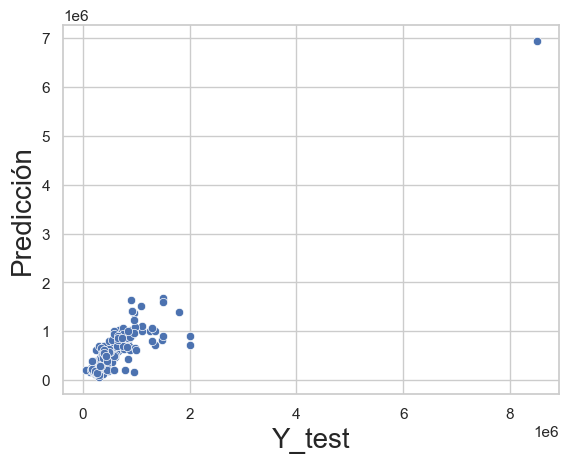

In [59]:
prediccion_modelo('house')

# 6.2.4 Modelo para Tipo de Propiedad Store 

In [60]:
# Para la generación del modelo en un nuevo tipo de Propiedad, trabajaremos sobre el DataFrame base. 
prop_prueba = propiedades.copy()

In [61]:
# Como para los tipos de propiedades anteriores, la 1era validación sólo considerará 
# las variables predictoras relacionadas con superficie de la propiedad

store = prop_prueba.loc[prop_prueba['property_type'] == 'store']

feature_cols = [x for x in store.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]
    
# Generando Train y Test 
X = store[feature_cols]
y = store['price_aprox_usd']

# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )  

X = X_train[['surface_total_in_m2',
       'surface_covered_in_m2']]
y = y_train

# Será agregada explícitamente una constante:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        price_aprox_usd   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     484.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          1.19e-124
Time:                        05:17:37   Log-Likelihood:                -8344.8
No. Observations:                 586   AIC:                         1.670e+04
Df Residuals:                     583   BIC:                         1.671e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.332e+

Siguiendo la misma metodología que para las otras propiedades, en este caso considerando sólo las features relacionadas con superficie se logra explicar en un 62% la variabilidad de los resultados. Dicho valor será considerado como valor base a mejorar en el entrenamiento del modelo. 

### 1era Ejecución (Tipo Propiedad Store)

In [62]:
tipo_propiedad_train('store')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     59.68
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          3.04e-128
Time:                        05:17:37   Log-Likelihood:                -8288.8
No. Observations:                 586   AIC:                         1.662e+04
Df Residuals:                     564   BIC:                         1.672e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
surface_total_in_m2     695.3882    173.712      4.003      0.000     354.186    1036.591
surface_covered_in_m2   477.9474    187.053      2.555      0.011     110.543     845.352
apartment             -8.402e-12    2.3e-10     -0.037      0.971   -4.59e-10    4.42e-10
house                  2.032e-10   1.13e-10      1.804      0.072    -1.8e-11    4.24e-10
store                  1.769e+05   9.05e+04      1.955      0.051    -853.800    3.55e+05
amb_2.0                1.003e-10   9.06e-11      1.107      0.269   -7.77e-11    2.78e-10
amb_3.0               -1.848e-10   7.37e-11     -2.508      0.012    -3.3e-10   -4.01e-11
amb_4.0                1.345e+05    3.6e+05      0.374      0.709   -5.72e+05    8.41e+05
amb_5.0                1.507e-10   7.76e-11      1.942      0.053   -1.74e-12    3.03e-10
amb_Mayor a 5          8.077e+04   2.66e+05      0.304      0.761   -4.42e+05    6.03e+05
amb_No Informado       7.788e+04   9.62e+04      0.810      0.418   -1.11e+05    2.67e+05
Almagro               -1.051e+05   6.73e+04     -1.561      0.119   -2.37e+05    2.71e+04
Balvanera             -4.186e+04   6.49e+04     -0.645      0.519   -1.69e+05    8.56e+04
Barrio Norte           -6.49e+04   5.45e+04     -1.190      0.234   -1.72e+05    4.22e+04
Belgrano              -4.078e+04   5.64e+04     -0.723      0.470   -1.52e+05       7e+04
Boedo                 -1.837e+05   7.62e+04     -2.410      0.016   -3.33e+05    -3.4e+04
Caballito             -1.777e+05   6.65e+04     -2.670      0.008   -3.08e+05    -4.7e+04
Capital Federal       -8.174e+04   5.15e+04     -1.587      0.113   -1.83e+05    1.94e+04
Flores                 2.444e+04   5.26e+04      0.465      0.642   -7.88e+04    1.28e+05
Monserrat             -1.053e+05   5.45e+04     -1.933      0.054   -2.12e+05    1709.883
Nuñez                  3.356e+05    7.7e+04      4.356      0.000    1.84e+05    4.87e+05
Palermo                5.878e+04    4.2e+04      1.399      0.162   -2.38e+04    1.41e+05
Puerto Madero          9.296e+05   1.24e+05      7.510      0.000    6.86e+05    1.17e+06
Recoleta               1.011e+05   4.46e+04      2.267      0.024    1.35e+04    1.89e+05
Saavedra              -6.195e+04   1.33e+05     -0.465      0.642   -3.24e+05       2e+05
San Telmo             -2.191e+05   5.64e+04     -3.884      0.000    -3.3e+05   -1.08e+05
Villa Crespo          -4.874e+04   4.53e+04     -1.077      0.282   -1.38e+05    4.02e+04
Villa Urquiza         -1.418e+05   8.96e+04     -1.582      0.114   -3.18e+05    3.42e+04
==============================================================================
Omnibus:                      248.059   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2331.624
Skew:                           1.612   Prob(JB):       

### 2da Ejecución (Tipo Propiedad Store)

In [63]:
# Para el caso del tipo de Propiedad Store, serán eliminadas las features relacionadas con 
# tipo de propiedad y numero de ambientes

prop_prueba.drop(['apartment', 'house', 'store', 'amb_2.0','amb_3.0', 'amb_4.0', 'amb_5.0', 
                            'amb_Mayor a 5', 'amb_No Informado'], axis = 1, inplace =True)

In [64]:
tipo_propiedad_train('store')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     69.87
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          7.56e-131
Time:                        05:17:37   Log-Likelihood:                -8289.1
No. Observations:                 586   AIC:                         1.662e+04
Df Residuals:                     567   BIC:                         1.670e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.487e+05   1.85e+04     13.414      0.000    2.12e+05    2.85e+05
surface_total_in_m2     698.0139    173.244      4.029      0.000     357.736    1038.291
surface_covered_in_m2   475.7359    186.583      2.550      0.011     109.257     842.215
Almagro               -9.918e+04   6.68e+04     -1.486      0.138    -2.3e+05    3.19e+04
Balvanera             -3.897e+04   6.47e+04     -0.603      0.547   -1.66e+05     8.8e+04
Barrio Norte          -5.892e+04   5.39e+04     -1.094      0.274   -1.65e+05    4.69e+04
Belgrano              -3.481e+04   5.58e+04     -0.624      0.533   -1.44e+05    7.48e+04
Boedo                 -1.819e+05    7.6e+04     -2.394      0.017   -3.31e+05   -3.26e+04
Caballito             -1.717e+05   6.55e+04     -2.621      0.009      -3e+05    -4.3e+04
Capital Federal       -7.476e+04   5.04e+04     -1.485      0.138   -1.74e+05    2.42e+04
Flores                 1.951e+04   5.21e+04      0.374      0.708   -8.28e+04    1.22e+05
Monserrat             -9.932e+04   5.38e+04     -1.846      0.065   -2.05e+05    6373.456
Nuñez                  3.414e+05   7.65e+04      4.460      0.000    1.91e+05    4.92e+05
Palermo                6.472e+04   4.12e+04      1.570      0.117   -1.63e+04    1.46e+05
Puerto Madero          9.354e+05   1.23e+05      7.587      0.000    6.93e+05    1.18e+06
Recoleta               1.058e+05   4.41e+04      2.401      0.017    1.93e+04    1.92e+05
Saavedra              -5.602e+04   1.33e+05     -0.422      0.673   -3.17e+05    2.05e+05
San Telmo             -2.134e+05   5.58e+04     -3.823      0.000   -3.23e+05   -1.04e+05
Villa Crespo          -4.795e+04   4.51e+04     -1.062      0.289   -1.37e+05    4.07e+04
Villa Urquiza         -1.412e+05   8.79e+04     -1.606      0.109   -3.14e+05    3.15e+04
==============================================================================
Omnibus:                      248.256   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2329.332
Skew:                           1.614   Prob(JB):                         0.00
Kurtosis:                      12.218   Cond. No.                     7.35e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.49e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Eliminando las features relacionadas con tipo de propiedad y numero de ambientes, se observa una mínima mejora para el valor de R2 ajustado respecto a la 1era ejecución, lo que podría sugerir que dichas features no estarían aportando en la explicación de la variabilidad de la columna target en el modelo.

### 3era Ejecución (Tipo Propiedad Store)

In [65]:
# Para esta ejecución serán eliminadas las features relacionadas con barrios cuyo p-values son los más elevados 
prop_prueba.drop(['Balvanera', 'Saavedra', 'Flores', 'Belgrano', 'Villa Crespo', 
                    'Almagro', 'Barrio Norte'], axis = 1, inplace =True)

In [66]:
tipo_propiedad_train('store')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price_aprox_usd   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     105.3
Date:                Thu, 01 Dec 2022   Prob (F-statistic):          3.02e-136
Time:                        05:17:37   Log-Likelihood:                -8290.3
No. Observations:                 586   AIC:                         1.661e+04
Df Residuals:                     573   BIC:                         1.666e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2.082e+05   2.28e+04      9.139      0.000    1.63e+05    2.53e+05
surface_total_in_m2     692.2370    172.155      4.021      0.000     354.105    1030.369
surface_covered_in_m2   484.5497    185.630      2.610      0.009     119.951     849.149
Boedo                 -1.416e+05   8.15e+04     -1.739      0.083   -3.02e+05    1.83e+04
Caballito             -1.316e+05   7.06e+04     -1.866      0.063    -2.7e+05    6953.731
Capital Federal       -3.487e+04    5.5e+04     -0.634      0.526   -1.43e+05    7.32e+04
Monserrat             -5.933e+04   5.83e+04     -1.018      0.309   -1.74e+05    5.52e+04
Nuñez                  3.816e+05   8.21e+04      4.648      0.000     2.2e+05    5.43e+05
Palermo                 1.05e+05   4.54e+04      2.312      0.021    1.58e+04    1.94e+05
Puerto Madero          9.749e+05   1.31e+05      7.442      0.000    7.18e+05    1.23e+06
Recoleta                1.46e+05   4.83e+04      3.023      0.003    5.11e+04    2.41e+05
San Telmo             -1.743e+05   6.05e+04     -2.878      0.004   -2.93e+05   -5.54e+04
Villa Urquiza         -1.008e+05   9.38e+04     -1.075      0.283   -2.85e+05    8.34e+04
==============================================================================
Omnibus:                      244.824   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2251.141
Skew:                           1.593   Prob(JB):                         0.00
Kurtosis:                      12.058   Cond. No.                     6.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Los p-values obtenidos para el entrenamiento del tipo de propiedad 'Store' con la 3era ejecución y anterior eliminación de features relacionadas con Barrios, encuentra una mejora del R2 ajustado alcanzado, que explica en mas del 65% la variabilidad de los resultados, es el valor máximo a registrar para este parámetro. 

Por ello, se procederá a evaluar el modelo considerando el grupo de datos para test. 

## 6.2.4.1 Evaluando el modelo con datos del conjunto test


                               Coeff
surface_total_in_m2       692.237025
surface_covered_in_m2     484.549737
Boedo                 -141643.724632
Caballito             -131619.318394
Capital Federal        -34873.326221
Monserrat              -59332.707863
Nuñez                  381637.742448
Palermo                104996.998617
Puerto Madero          974903.494081
Recoleta               146029.830212
San Telmo             -174250.579173
Villa Urquiza         -100836.458919


(('R2_test: ', 0.48633034467773606),
 ('R2 ajustado_test: ', 0.4403300770369363),
 ('Mean Absolute Error_test:', 270688.81819808466),
 ('Mean Squared Error_test:', 308486141309.67285),
 ('Root Mean Squared Error_test:', 555415.2872488053))

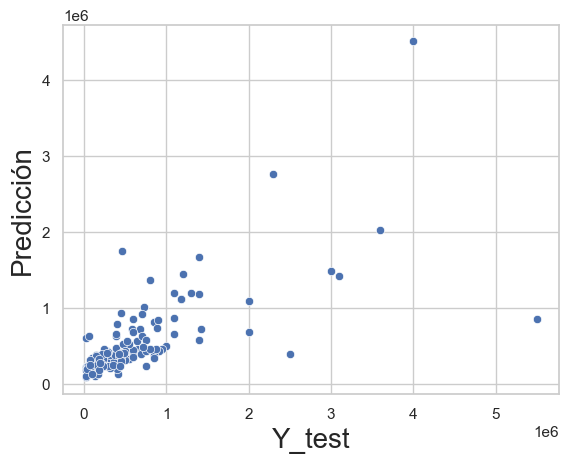

In [67]:
prediccion_modelo('store')

Hay overfitting en el Store, estudiar este caso

# Mirar el código hasta acá

## Regularización RIDGE

Vamos a elegir el tipo de propiedad 'Apartment' por tener mayor cantidad de datos y menor R2, en búsqueda de mejorar su valor. 

In [68]:
# Para la generación del modelo en un nuevo tipo de Propiedad, trabajaremos sobre el DataFrame base. 
prop_prueba = propiedades.copy()

In [107]:
apartment = prop_prueba.loc[prop_prueba['property_type'] == 'apartment']

apartment.drop(['apartment', 'house', 'store', 'Capital Federal', 'Recoleta' ], axis = 1, inplace =True)
    
feature_cols = [x for x in apartment.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'place_name'))]
    
# Generando Train y Test 
X = apartment[feature_cols]
y = apartment['price_aprox_usd']




# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 123,
                                     )  


# Normalizando los datos 

from sklearn import preprocessing

Stdscaler = preprocessing.StandardScaler().fit(X_train)
X_train = Stdscaler.transform(X_train)
print(Scaled_data)





[[-0.22796364 -0.25358275 -0.36614089 ... -0.25560426 -0.24657557
  -0.26886815]
 [-0.24460832 -0.29012648  2.73118911 ... -0.25560426 -0.24657557
  -0.26886815]
 [-0.18912604 -0.18963122 -0.36614089 ... -0.25560426 -0.24657557
  -0.26886815]
 ...
 [-0.18357782 -0.14395155 -0.36614089 ... -0.25560426 -0.24657557
  -0.26886815]
 [ 0.35541968  0.14839832 -0.36614089 ... -0.25560426 -0.24657557
  -0.26886815]
 [-0.21131895 -0.16222342 -0.36614089 ... -0.25560426 -0.24657557
  -0.26886815]]


C:\Users\mpire\AppData\Local\Temp\ipykernel_18136\1119039406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartment.drop(['apartment', 'house', 'store', 'Capital Federal', 'Recoleta' ], axis = 1, inplace =True)


In [108]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# ==============================================================================
# Por defecto RidgeCV utiliza el mean squared error

modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


Para evaluar cómo se aproximan a cero los coeficientes a medida que se incrementa el valor de alpha y la evolución del error de validación cruzada en función del alpha empleado.

c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behav

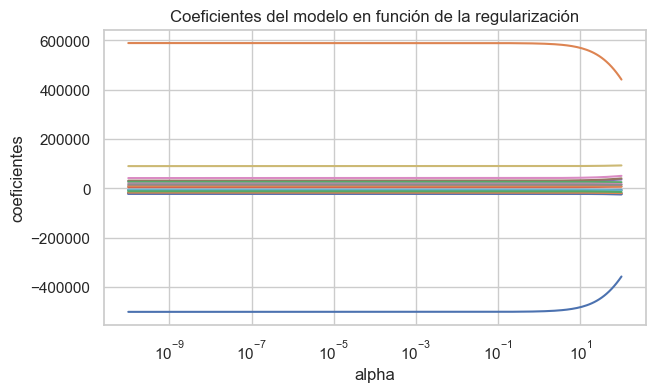

In [109]:
alphas = modelo.alphas

coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize = True)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())


fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

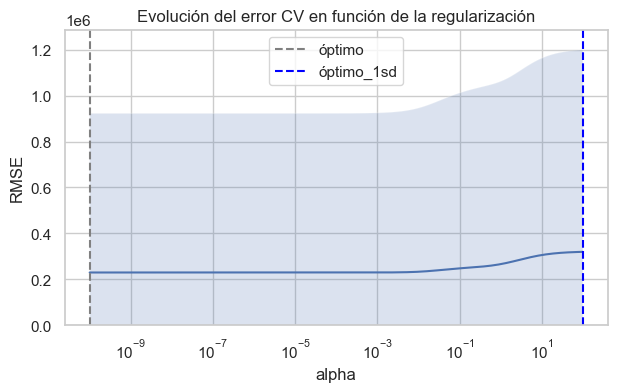

In [110]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [113]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 1e-10


In [112]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [114]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

c:\Users\mpire\anaconda3\envs\DH\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


array([-2.57995339e+06,  3.78992574e+06,  1.38867239e+06, -4.25475215e+07,
        1.04229240e+07, -3.28651591e+04,  2.91879666e+06,  1.78291618e+06,
        1.93505060e+07,  3.86500524e+06])

In [115]:
# Error de test del modelo 
# ==============================================================================
rmse_ridge = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )
print("")
print(f"El error (rmse) de test es: {rmse_ridge}")


El error (rmse) de test es: 38068830.74785556


## 2.2 Discriminando por tipo de propiedad y ubicación

In [69]:
def OLS_ubicacion_propiedad(property_type, ubicacion = 'Capital Federal'):
    property_type = propiedades.loc[(propiedades['property_type'] == property_type) & (propiedades['state_name'] == ubicacion) ]
    feature_cols = [x for x in property_type.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'state_name'))]
    
    # Generando modelo OLS
    X = property_type[feature_cols]
    y = property_type['price_aprox_usd']

    # Será agregada explícitamente una constante:
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    return model.summary()

## Ridge Regression

In [70]:
def linear_regression_train(property_type, ubicacion):
    property_type = propiedades.loc[(propiedades['property_type'] == property_type) & (propiedades['state_name'] == ubicacion) ]
    feature_cols = [x for x in property_type.columns if ((x != 'property_type') & (x != 'price_aprox_usd') & (x != 'state_name'))]
    X = property_type[feature_cols]
    y = property_type['price_aprox_usd']
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)
    # Hay que normalizar las variables
    Xtrain_sklearn = Xtrain[feature_cols]
    model = LinearRegression(fit_intercept=True)

    model.fit(Xtrain_sklearn, ytrain)

    return model.coef_, model.intercept_


In [71]:
linear_regression_train('apartment', 'Capital Federal')

KeyError: 'state_name'

In [ ]:
# Modelo de Regresión lineal
Xtrain_sklearn = Xtrain[feature_cols]
#deberiamos normalizar las features!! van a ver cómo hacerlo en la práctica guiada

model = LinearRegression(fit_intercept=True)

model.fit(Xtrain_sklearn, ytrain)

print(model.coef_)

print(model.intercept_)

[-3.39128558e+00  3.64396918e+02  5.04512644e+04  1.49928388e+05
  2.08126234e+05  2.55870103e+04  6.27645124e+04  1.10369225e+05
  1.85367513e+05  1.89834042e+05  7.22283785e+04  1.04267811e+05
 -2.67539190e+04 -8.30981784e+03 -1.36013287e+04 -5.55982063e+04
  1.20354856e+05 -1.92536359e+04 -2.57771789e+04]
-15573.056014806149


In [ ]:
# Aplicando Ridge Regression

rlm = linear_model.Ridge(alpha=0.5, normalize=True)

# Ajustamos nuevamente, esta vez con regularizacion
X = np.vander(xs, 4)[:,:-1]
y = ys

ridge_model = rlm.fit(X, y)
predictions = ridge_model.predict(X)

plt.scatter(xs, ys)

plt.title("Muestra de datos #1")
plt.scatter(xs, predictions, c='r')
print ("r^2:", ridge_model.score(X, ys))

# Falta hacer un modelo considerando otra zona geográfica 

# Averiguar cuando se hace el Scaler(escalado)